In [1]:
import json
import numpy as np
import time

from src.experiments.aux_code import *
from datasets.get_datasets import *
import time
from src.brkga.genetic import genetic as brkga
from src.brkga_variation.genetic import genetic as brkga_var
from src.s_genetic.genetic import *
from src.predicate import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
source='teamplayssport'
target='companyeconomicsector'

In [3]:
kb = json.loads(open('src/experiments/kb.txt').readline())

kb_source = kb['nell_sports']
kb_target = kb['nell_finances']

In [4]:
pred_target = create_pred_target(kb_target)

In [5]:
sports_dataset = datasets.load('nell_sports', kb_source, target=source, seed=441773, balanced=0) #facts, pos, neg
finances_dataset = datasets.load('nell_finances', kb_target, target=target, seed=441773, balanced=0) #facts, pos, neg

# train_facts_source, train_pos_source, train_neg_source = get_train_division(sports_dataset)
# background_knowledge_src = boostsrl.modes(kb_source, [source], useStdLogicVariables=False, 
#                                       maxTreeDepth=3, nodeSize=2, numOfClauses=8)
# # model_src = boostsrl.train(background_knowledge_src, train_pos_source, np.random.choice(train_neg_source, 2*len(train_pos_source)), train_facts_source, trees=10)
# model_src = boostsrl.train(background_knowledge_src, train_pos_source, train_neg_source, train_facts_source, trees=10)

# structured_src, new_src_struct = create_structured_trees(model_src)

In [6]:
s_src = [['teamplayssport(A, B)',
  {'': 'athleteplayssport(C, B)',
   'true': 'athleteledsportsteam(C, D)',
   'true,true': 'teamplaysinleague(A, E), teamplaysinleague(D, E)',
   'true,true,true': 'athleteplaysforteam(C, D)',
   'true,true,false': 'teamplaysagainstteam(A, F), athleteplaysforteam(G, A)',
   'true,false': 'teamplaysagainstteam(H, A), athleteplaysinleague(C, I)',
   'true,false,true': 'athleteplaysforteam(J, H), athleteplaysinleague(J, I)',
   'true,false,false': 'teamalsoknownas(K, A)'},
  {'true,true,true,true': [1.08e-06, 0, 235],
   'true,true,true,false': [0.943, 1, 8],
   'true,true,false,true': [1.604, 3, 18],
   'true,true,false,false': [1.966, 4, 113],
   'true,false,true,true': [0.816, 1, 2],
   'true,false,true,false': [0.0, 0, 13],
   'true,false,false,true': [0.866, 1, 3],
   'true,false,false,false': [1.095, 3, 2],
   'false': [0.062, 781, 3]}],
 ['teamplayssport(A, B)',
  {'': 'athleteplayssport(C, B), athleteplaysinleague(C, D)',
   'true': 'athleteledsportsteam(C, E)',
   'true,true': 'teamplaysagainstteam(F, A), teamalsoknownas(G, F)',
   'true,false': 'teamplaysinleague(A, H), athleteplaysinleague(I, H)',
   'true,false,true': 'teamplaysagainstteam(A, J)',
   'false': 'teamplaysinleague(A, K)',
   'false,false': 'athleteplayssport(L, B)',
   'false,false,false': 'teamplaysagainstteam(A, M), teamalsoknownas(A, N)'},
  {'true,true,true': [0.102, 0, 163],
   'true,true,false': [0.097, 2, 211],
   'true,false,true,true': [0.816, 1, 2],
   'true,false,true,false': [0.981, 2, 3],
   'true,false,false': [0.091, 0, 12],
   'false,true': [0.054, 613, 2],
   'false,false,true': [0.816, 1, 2],
   'false,false,false,true': [0.949, 9, 1],
   'false,false,false,false': [0.997, 172, 1]}],
 ['teamplayssport(A, B)',
  {'': 'athleteplayssport(C, B), athleteplaysinleague(C, D)',
   'true': 'teamplaysagainstteam(E, A), teamplaysinleague(A, F)',
   'true,false': 'teamalsoknownas(G, A), teamplaysinleague(A, H)',
   'true,false,false': 'athleteledsportsteam(C, I), teamplaysagainstteam(A, J)',
   'false': 'teamalsoknownas(K, A), teamalsoknownas(L, K)',
   'false,true': 'teamplaysagainstteam(A, L), athleteplaysforteam(M, L)',
   'false,true,true': 'teamalsoknownas(N, L)',
   'false,true,false': 'teamalsoknownas(K, L)'},
  {'true,true': [0.071, 1, 211],
   'true,false,true': [0.054, 0, 21],
   'true,false,false,true': [1.356, 2, 20],
   'true,false,false,false': [2.142, 5, 139],
   'false,true,true,true': [7.45e-09, 22, 0],
   'false,true,true,false': [1.0, 2, 2],
   'false,true,false,true': [0.896, 81, 1],
   'false,true,false,false': [0.189, 4, 0],
   'false,false': [0.06, 694, 3]}],
 ['teamplayssport(A, B)',
  {'': 'athleteplayssport(C, B), athleteplaysinleague(C, D)',
   'true': 'athleteledsportsteam(C, E)',
   'true,true': 'teamplaysinleague(A, F), teamplaysinleague(E, F)',
   'true,true,false': 'athleteplaysforteam(C, G), teamalsoknownas(E, G)',
   'false': 'teamplaysinleague(A, H)',
   'false,true': 'teamalsoknownas(I, A), athleteplaysforteam(J, I)',
   'false,false': 'teamplaysagainstteam(A, K), teamalsoknownas(L, A)',
   'false,false,false': 'teamplaysagainstteam(M, A)'},
  {'true,true,true': [0.084, 0, 188],
   'true,true,false,true': [1.261, 2, 8],
   'true,true,false,false': [1.988, 4, 178],
   'true,false': [0.039, 0, 17],
   'false,true,true': [0.165, 60, 2],
   'false,true,false': [0.146, 584, 0],
   'false,false,true': [0.807, 3, 1],
   'false,false,false,true': [0.026, 66, 0],
   'false,false,false,false': [1.566, 107, 3]}],
 ['teamplayssport(A, B)',
  {'': 'athleteplayssport(C, B)',
   'true': 'athleteledsportsteam(C, D)',
   'true,true': 'athleteplaysforteam(E, A), athleteledsportsteam(E, F)',
   'true,true,true': 'teamplaysagainstteam(A, D), athleteplaysforteam(C, D)',
   'true,true,false': 'teamplaysagainstteam(A, G)',
   'true,false': 'teamplaysinleague(A, H), athleteplaysinleague(I, H)',
   'true,false,true': 'athleteplayssport(I, J)',
   'true,false,false': 'teamplaysagainstteam(K, A)'},
  {'true,true,true,true': [0.074, 0, 88],
   'true,true,true,false': [1.282, 2, 11],
   'true,true,false,true': [0.197, 0, 114],
   'true,true,false,false': [1.376, 2, 161],
   'true,false,true,true': [0.485, 5, 0],
   'true,false,true,false': [0.974, 2, 5],
   'true,false,false,true': [0.529, 1, 10],
   'true,false,false,false': [0.83, 1, 5],
   'false': [0.059, 782, 3]}],
 ['teamplayssport(A, B)',
  {'': 'athleteledsportsteam(C, A), athleteplayssport(C, D)',
   'true': 'athleteplayssport(E, B), athleteledsportsteam(E, F)',
   'true,true': 'teamplaysagainstteam(A, F)',
   'true,true,true': 'teamalsoknownas(G, A), teamalsoknownas(G, F)',
   'false': 'athleteplayssport(H, B)',
   'false,true': 'athleteplaysforteam(H, I)',
   'false,true,true': 'teamplaysinleague(A, J), athleteledsportsteam(K, I)',
   'false,true,false': 'athleteplaysinleague(H, L), teamplaysagainstteam(M, A)'},
  {'true,true,true,true': [0.961, 1, 12],
   'true,true,true,false': [0.07, 0, 75],
   'true,true,false': [0.843, 1, 3],
   'true,false': [0.368, 216, 0],
   'false,true,true,true': [1.784, 4, 204],
   'false,true,true,false': [1.237, 2, 82],
   'false,true,false,true': [0.746, 1, 15],
   'false,true,false,false': [1.09, 4, 3],
   'false,false': [0.068, 597, 3]}],
 ['teamplayssport(A, B)',
  {'': 'athleteplayssport(C, B), athleteplaysinleague(C, D)',
   'true': 'athleteledsportsteam(E, A)',
   'true,false': 'teamplaysinleague(A, F), teamplaysagainstteam(A, G)',
   'true,false,true': 'athleteledsportsteam(C, H), teamplaysinleague(H, F)',
   'true,false,false': 'teamplaysagainstteam(I, A), teamplaysinleague(I, J)',
   'false': 'teamalsoknownas(K, A), athleteplaysforteam(L, K)',
   'false,true': 'teamplaysagainstteam(M, A), teamplaysagainstteam(M, K)',
   'false,true,false': 'athleteledsportsteam(L, K)'},
  {'true,true': [0.159, 0, 107],
   'true,false,true,true': [0.996, 1, 69],
   'true,false,true,false': [1.784, 4, 29],
   'true,false,false,true': [0.147, 0, 37],
   'true,false,false,false': [1.716, 3, 149],
   'false,true,true': [0.05, 45, 0],
   'false,true,false,true': [0.0, 3, 0],
   'false,true,false,false': [1.066, 5, 2],
   'false,false': [0.066, 699, 4]}],
 ['teamplayssport(A, B)',
  {'': 'athleteplayssport(C, B), athleteplaysinleague(C, D)',
   'true': 'teamplaysinleague(A, E), athleteplaysinleague(F, E)',
   'true,true': 'athleteledsportsteam(C, G)',
   'true,true,true': 'teamplaysinleague(G, E), teamalsoknownas(G, H)',
   'true,true,false': 'athleteplaysforteam(I, A)',
   'false': 'teamalsoknownas(J, A), athleteplaysforteam(K, J)',
   'false,true': 'teamplaysagainstteam(L, A), teamplaysagainstteam(L, J)',
   'false,true,false': 'athleteledsportsteam(K, J)'},
  {'true,true,true,true': [1.404, 2, 185],
   'true,true,true,false': [1.883, 4, 37],
   'true,true,false,true': [0.081, 3, 0],
   'true,true,false,false': [0.018, 0, 5],
   'true,false': [0.144, 0, 164],
   'false,true,true': [0.087, 45, 0],
   'false,true,false,true': [1.86e-09, 3, 0],
   'false,true,false,false': [1.065, 3, 2],
   'false,false': [0.067, 716, 4]}],
 ['teamplayssport(A, B)',
  {'': 'athleteplayssport(C, B), athleteplaysforteam(C, D)',
   'true': 'teamalsoknownas(A, E), teamplaysagainstteam(A, F)',
   'true,true': 'athleteplaysforteam(G, A), athleteplaysforteam(H, F)',
   'true,true,false': 'athleteledsportsteam(C, D), teamalsoknownas(D, I)',
   'true,false': 'teamplaysagainstteam(A, J), teamalsoknownas(J, A)',
   'true,false,true': 'teamalsoknownas(J, D)',
   'true,false,false': 'teamalsoknownas(D, K), teamalsoknownas(K, L)',
   'false': 'teamplaysagainstteam(A, M), teamalsoknownas(N, A)'},
  {'true,true,true': [0.079, 0, 28],
   'true,true,false,true': [1.222, 3, 3],
   'true,true,false,false': [0.024, 0, 4],
   'true,false,true,true': [0.029, 0, 13],
   'true,false,true,false': [0.724, 2, 1],
   'true,false,false,true': [2.369, 6, 174],
   'true,false,false,false': [0.822, 2, 153],
   'false,true': [0.168, 64, 6],
   'false,false': [0.081, 662, 15]}],
 ['teamplayssport(A, B)',
  {'': 'athleteplayssport(C, B)',
   'true': 'athleteledsportsteam(C, D), teamplaysagainstteam(D, A)',
   'true,false': 'teamplaysagainstteam(A, E), athleteledsportsteam(F, E)',
   'true,false,true': 'athleteplaysinleague(F, G), teamplaysinleague(A, G)',
   'true,false,false': 'teamplaysinleague(A, H), teamalsoknownas(I, A)',
   'false': 'teamalsoknownas(J, A), teamplaysagainstteam(A, K)',
   'false,true': 'teamalsoknownas(L, K)',
   'false,true,false': 'teamalsoknownas(K, J)'},
  {'true,true': [0.103, 0, 165],
   'true,false,true,true': [1.526, 9, 4],
   'true,false,true,false': [0.381, 1, 27],
   'true,false,false,true': [0.415, 0, 25],
   'true,false,false,false': [2.65, 9, 173],
   'false,true,true': [0.037, 48, 0],
   'false,true,false,true': [1.216, 6, 2],
   'false,true,false,false': [0.019, 8, 0],
   'false,false': [0.038, 681, 1]}]]

In [7]:
import copy
src_struct = copy.deepcopy(s_src)
new_src_struct = []
for i in range(0, len(src_struct)):
    new_src_struct.append(define_individual(src_struct[i], i))  
structured_src = src_struct

In [40]:
new_src_struct

[['0;;teamplayssport(A, B) :- athleteplayssport(C, B).;true;false',
  '0;true;athleteledsportsteam(C, D).;true;true',
  '0;true,true;teamplaysinleague(A, E), teamplaysinleague(D, E).;true;true',
  '0;true,true,true;athleteplaysforteam(C, D).;false;false',
  '0;true,true,false;teamplaysagainstteam(A, F), athleteplaysforteam(G, A).;false;false',
  '0;true,false;teamplaysagainstteam(H, A), athleteplaysinleague(C, I).;true;true',
  '0;true,false,true;athleteplaysforteam(J, H), athleteplaysinleague(J, I).;false;false',
  '0;true,false,false;teamalsoknownas(K, A).;false;false'],
 ['1;;teamplayssport(A, B) :- athleteplayssport(C, B), athleteplaysinleague(C, D).;true;true',
  '1;true;athleteledsportsteam(C, E).;true;true',
  '1;true,true;teamplaysagainstteam(F, A), teamalsoknownas(G, F).;false;false',
  '1;true,false;teamplaysinleague(A, H), athleteplaysinleague(I, H).;true;false',
  '1;true,false,true;teamplaysagainstteam(A, J).;false;false',
  '1;false;teamplaysinleague(A, K).;false;true',
 

In [8]:
train_facts, train_pos, train_neg, test_facts, test_pos, test_neg = get_train_test(finances_dataset, 0)

facts = []
facts.extend(train_facts[0])
facts.extend(train_facts[1])
facts.extend(test_facts)
train_facts = [copy.deepcopy(facts), copy.deepcopy(facts)]
test_facts = [copy.deepcopy(facts)]

0


In [31]:
train_facts = []
train_pos = []
train_neg = []

test_facts = []
test_pos = []
test_neg = []

with open('train_facts.txt', 'r') as f:
    for line in f.readlines():
        train_facts.append(json.loads(line))
f.close()

with open('train_neg.txt', 'r') as f:
    for line in f.readlines():
        train_neg.append(json.loads(line))
f.close()

with open('train_pos.txt', 'r') as f:
    for line in f.readlines():
        train_pos.append(json.loads(line))
f.close()

with open('test_facts.txt', 'r') as f:
    for line in f.readlines():
        test_facts.append(json.loads(line))
f.close()

with open('test_pos.txt', 'r') as f:
    tt = []
    for line in f.readlines():
        tt.append(line)
    for i in tt:
        test_pos.append("".join(json.loads(i)))
f.close()

with open('test_neg.txt', 'r') as f:
    tt = []
    for line in f.readlines():
        tt.append(line)
    for i in tt:
        test_neg.append("".join(json.loads(i)))
f.close()

In [41]:
with open('train_facts.txt', 'w') as f:
    for line in train_facts:
        f.write(json.dumps(line))
        f.write('\n')
f.close()

with open('train_neg.txt', 'w') as f:
    for line in train_neg:
        f.write(json.dumps(list(line)))
        f.write('\n')
f.close()

with open('train_pos.txt', 'w') as f:
    for line in train_pos:
        f.write(json.dumps(list(line)))
        f.write('\n')
f.close()

with open('test_facts.txt', 'w') as f:
    for line in test_facts:
        f.write(json.dumps(list(line)))
        f.write('\n')
f.close()

with open('test_pos.txt', 'w') as f:
    for line in test_pos:
        f.write(json.dumps(list(line)))
        f.write('\n')
f.close()

with open('test_neg.txt', 'w') as f:
    for line in test_neg:
        f.write(json.dumps(list(line)))
        f.write('\n')
f.close()

In [10]:
def get_k_best_individuals(population, k):
    best_ind = []
    all_fitness = []
    for i in range(0, len(population)):
        all_fitness.append((population[i].fitness.values[0], i))
    
    sorted_ind = sorted(all_fitness, key=lambda tup: tup[0])
    for i in range(0, k):
        best_ind.append(population[sorted_ind[i][1]])
    return best_ind

# Crossover original

## sem revisão

In [11]:
start = time.time()
res_rc = genetic(new_src_struct, target, source, train_pos, 
                                         train_neg, train_facts, kb_source, kb_target, pred_target,
                                          NUM_GEN=14, pop_size=30)
print("FIM DO GROOT GENETIC: ", time.time()-start)

/Users/leticia.figueiredo/opt/anaconda3/envs/groot/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/leticia.figueiredo/opt/anaconda3/envs/groot/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


GENERATION:  0
MELHOR RESULTADO:  -0.32207775564644325
estou nesse crossover
BEST: {'m_auc_pr': 0.0375615, 'm_auc_roc': 0.7936215, 'm_cll': -0.31988, 'm_rec': 0.0, 'm_pred': 0.25, 'm_f1': nan, 's_auc_pr': 0.0034865, 's_auc_roc': 0.016376500000000016, 's_cll': 0.0010930000000000106, 's_rec': 0.0, 's_prec': 0.25, 's_f1': nan}
GENERATION:  1
MELHOR RESULTADO:  -0.32207775564644325
estou nesse crossover
BEST: {'m_auc_pr': 0.0375615, 'm_auc_roc': 0.7936215, 'm_cll': -0.31988, 'm_rec': 0.0, 'm_pred': 0.25, 'm_f1': nan, 's_auc_pr': 0.0034865, 's_auc_roc': 0.016376500000000016, 's_cll': 0.0010930000000000106, 's_rec': 0.0, 's_prec': 0.25, 's_f1': nan}
GENERATION:  2
MELHOR RESULTADO:  -0.32207775564644325
estou nesse crossover
BEST: {'m_auc_pr': 0.0375615, 'm_auc_roc': 0.7936215, 'm_cll': -0.31988, 'm_rec': 0.0, 'm_pred': 0.25, 'm_f1': nan, 's_auc_pr': 0.0034865, 's_auc_roc': 0.016376500000000016, 's_cll': 0.0010930000000000106, 's_rec': 0.0, 's_prec': 0.25, 's_f1': nan}
GENERATION:  3
MELHOR 

In [12]:
res_rc

(<src.s_genetic.population.Population at 0x7fa9e22cbc18>,
 [-0.32207775564644325,
  -0.32207775564644325,
  -0.32207775564644325,
  -0.32735099974072174,
  -0.32735099974072174,
  -0.32735099974072174,
  -0.3655850267177938,
  -0.3655850267177938,
  -0.36892446088630393,
  -0.36892446088630393,
  -0.36892446088630393,
  -0.36892446088630393,
  -0.36892446088630393,
  -0.36892446088630393,
  -0.3899306564778538],
 [{'m_auc_pr': 0.0375615,
   'm_auc_roc': 0.7936215,
   'm_cll': -0.31988,
   'm_rec': 0.0,
   'm_pred': 0.25,
   'm_f1': nan,
   's_auc_pr': 0.0034865,
   's_auc_roc': 0.016376500000000016,
   's_cll': 0.0010930000000000106,
   's_rec': 0.0,
   's_prec': 0.25,
   's_f1': nan},
  {'m_auc_pr': 0.0375615,
   'm_auc_roc': 0.7936215,
   'm_cll': -0.31988,
   'm_rec': 0.0,
   'm_pred': 0.25,
   'm_f1': nan,
   's_auc_pr': 0.0034865,
   's_auc_roc': 0.016376500000000016,
   's_cll': 0.0010930000000000106,
   's_rec': 0.0,
   's_prec': 0.25,
   's_f1': nan},
  {'m_auc_pr': 0.0375615,


In [13]:
# final_results[f'groot_test:{source}->{target}'] = []
# final_results[f'groot_test_rev:{source}->{target}'] = []
# final_results[f'inf_res:{source}->{target}'] = []
# final_results[f'inf_res_rev:{source}->{target}'] = []

# uwcse_dataset = datasets.load('uwcse', kb_target, target=target, seed=441773)
# train_facts, train_pos, train_neg, test_facts, test_pos, test_neg = get_train_test(uwcse_dataset, 1)
# tr_train_pos = []
# tr_train_neg = []
# tr_train_facts = []

# for i in range(0, len(train_pos)):
#     tr_train_pos.extend(train_pos[i])
#     tr_train_neg.extend(train_neg[i])
#     tr_train_facts.extend(train_facts[i])

# train = [tr_train_pos, tr_train_neg, tr_train_facts]
test = [test_pos, test_neg, test_facts[0]]

individuals_rc = get_k_best_individuals(res_rc[0].population, 3)

# n_ind = 1
# for individual in individuals:
#     print("INDIVIDUO ", n_ind)
#     refine, transfer = get_refine_transfer(individual, source, target, 'nell_sports', 'nell_finances')
#     for i in range(len(train_pos)):
#         ttrain = [train_pos[i], train_neg[i][:len(train_pos[i])], train_facts[i]]
#         res_ = test_refine_transfer(kb_target, target, refine, transfer, ttrain, test)
#         print(res_)
# #         final_results[f'groot_test:{source}->{target}'].append(res)
# #         import os
#     #     thisFile = f'boostsrl/best/test/results_{target.replace('recursion_', '')}.db'
#     #     thisFile = f'boostsrl/best/test/results_{target}.db'
#     #     base = os.path.splitext(thisFile)[0]
#     #     os.rename(thisFile, base + ".txt")
#     #     tt = open('boostsrl/best/test/results_advisedby.txt', 'r').readlines()
#     #     final = []
#     #     for i in tt:
#     #         final.append(i.replace('\n', ''))
#     #     final_results[f'inf_res:{source}->{target}'].append(final)
#         print("===========================================================================")
# #         break

#     n_ind += 1

In [14]:
individuals_rc = get_k_best_individuals(res_rc[0].population, 3)
n_i = 1
for ind in individuals_rc:
    refine, transfer = get_refine_transfer(ind, source, target, 'nell_sports', 'nell_finances')
    print("INDIVIDUO ", n_i)
    print("REFINE: ", refine)
    print("TRANSFER: ", transfer)
    print("==========================")
    n_i += 1


INDIVIDUO  1
REFINE:  ['0;;teamplayssport00(A,B):- athleteplayssport01(C, B);true;false', '0;true;athleteledsportsteam02(C, D).;true;true', '0;true,true;teamplaysinleague03(A, E), teamplaysinleague04(D, E).;true;true', '0;true,true,true;athleteplaysforteam04(C, D).;false;false', '0;true,true,false;teamplaysagainstteam05(A, F), athleteplaysforteam06(G, A).;false;false', '0;true,false;teamplaysagainstteam06(H, A), athleteplaysinleague07(I, C).;true;true', '0;true,false,true;athleteplaysforteam07(J, H), athleteplaysinleague08(I, J).;false;false', '0;true,false,false;teamalsoknownas08(K, A).;false;false', '1;;teamplayssport10(A,B):- athleteplayssport11(C, B), athleteplaysinleague11(D, C);true;true', '1;true;athleteledsportsteam12(C, E).;true;true', '1;true,true;teamplaysagainstteam13(F, A), teamalsoknownas14(G, F).;false;false', '1;true,false;teamplaysinleague14(H, A), athleteplaysinleague15(I, H).;true;false', '1;true,false,true;teamplaysagainstteam15(A, J).;false;false', '1;false;teampla

## Aleatório

In [15]:
start = time.time()
res_a_c = genetic(new_src_struct, target, source, train_pos, 
                                         train_neg, train_facts, kb_source, kb_target, pred_target,
                                          NUM_GEN=14, pop_size=30, revision='random')
print("FIM DO GROOT GENETIC: ", time.time()-start)

GENERATION:  0
MELHOR RESULTADO:  -0.24708988438268772
estou nesse crossover
BEST: {'m_auc_pr': 0.0368805, 'm_auc_roc': 0.9694309999999999, 'm_cll': -0.24432199999999998, 'm_rec': 0.8841915, 'm_pred': 0.26174675000000003, 'm_f1': 0.045771000000000006, 's_auc_pr': 0.0062875, 's_auc_roc': 0.0004909999999999637, 's_cll': 5.9999999999990616e-05, 's_rec': 0.020220499999999975, 's_prec': 0.238253519190562, 's_f1': 0.0009879999999999993}
GENERATION:  1
MELHOR RESULTADO:  -0.28682109052595833
estou nesse crossover
BEST: {'m_auc_pr': 0.08115449999999999, 'm_auc_roc': 0.9777415, 'm_cll': -0.27510049999999997, 'm_rec': 0.3970585, 'm_pred': 0.32243374999999996, 'm_f1': 0.212264, 's_auc_pr': 0.004139499999999997, 's_auc_roc': 0.0005364999999999953, 's_cll': 0.0011015000000000053, 's_rec': 0.003676499999999999, 's_prec': 0.177594096937898, 's_f1': 0.005301}
GENERATION:  2
MELHOR RESULTADO:  -0.3005812665528243
estou nesse crossover
BEST: {'m_auc_pr': 0.0117505, 'm_auc_roc': 0.941775, 'm_cll': -0.300

In [16]:
res_a_c

(<src.s_genetic.population.Population at 0x7fa9b7ad4cc0>,
 [-0.24708988438268772,
  -0.28682109052595833,
  -0.3005812665528243,
  -0.3005812665528243,
  -0.3005812665528243,
  -0.8945696161977837,
  -1.0101397485730625,
  -1.0101397485730625,
  -1.0101397485730625,
  -1.0101397485730625,
  -1.0101397485730625,
  -1.0101397485730625,
  -1.0101397485730625,
  -1.0101397485730625,
  -1.0101397485730625],
 [{'m_auc_pr': 0.0368805,
   'm_auc_roc': 0.9694309999999999,
   'm_cll': -0.24432199999999998,
   'm_rec': 0.8841915,
   'm_pred': 0.26174675000000003,
   'm_f1': 0.045771000000000006,
   's_auc_pr': 0.0062875,
   's_auc_roc': 0.0004909999999999637,
   's_cll': 5.9999999999990616e-05,
   's_rec': 0.020220499999999975,
   's_prec': 0.238253519190562,
   's_f1': 0.0009879999999999993},
  {'m_auc_pr': 0.08115449999999999,
   'm_auc_roc': 0.9777415,
   'm_cll': -0.27510049999999997,
   'm_rec': 0.3970585,
   'm_pred': 0.32243374999999996,
   'm_f1': 0.212264,
   's_auc_pr': 0.00413949999999

In [17]:
# final_results[f'groot_test:{source}->{target}'] = []
# final_results[f'groot_test_rev:{source}->{target}'] = []
# final_results[f'inf_res:{source}->{target}'] = []
# final_results[f'inf_res_rev:{source}->{target}'] = []

# uwcse_dataset = datasets.load('uwcse', kb_target, target=target, seed=441773)
# train_facts, train_pos, train_neg, test_facts, test_pos, test_neg = get_train_test(uwcse_dataset, 1)
# tr_train_pos = []
# tr_train_neg = []
# tr_train_facts = []

# for i in range(0, len(train_pos)):
#     tr_train_pos.extend(train_pos[i])
#     tr_train_neg.extend(train_neg[i])
#     tr_train_facts.extend(train_facts[i])

# train = [tr_train_pos, tr_train_neg, tr_train_facts]
test = [test_pos, test_neg, test_facts[0]]

individuals = get_k_best_individuals(res_a_c[0].population, 3)

n_ind = 1
for individual in individuals:
    print("INDIVIDUO ", n_ind)
    refine, transfer = get_refine_transfer(individual, source, target, 'nell_sports', 'nell_finances')
    for i in range(len(train_pos)):
        ttrain = [train_pos[i], train_neg[i][:len(train_pos[i])], train_facts[i]]
        res_ = test_refine_transfer(kb_target, target, refine, transfer, ttrain, test)
        print(res_)
#         final_results[f'groot_test:{source}->{target}'].append(res)
#         import os
    #     thisFile = f'boostsrl/best/test/results_{target.replace('recursion_', '')}.db'
    #     thisFile = f'boostsrl/best/test/results_{target}.db'
    #     base = os.path.splitext(thisFile)[0]
    #     os.rename(thisFile, base + ".txt")
    #     tt = open('boostsrl/best/test/results_advisedby.txt', 'r').readlines()
    #     final = []
    #     for i in tt:
    #         final.append(i.replace('\n', ''))
    #     final_results[f'inf_res:{source}->{target}'].append(final)
        print("===========================================================================")
#         break

    n_ind += 1

INDIVIDUO  1
({'AUC ROC': 0.999623, 'AUC PR': 0.973354, 'CLL': -0.265389, 'Precision': [0.882129, 0.5], 'Recall': 0.991453, 'F1': 0.933602}, <boostsrl.boostsrl.test object at 0x7fa9db4daeb8>)
({'AUC ROC': 0.999652, 'AUC PR': 0.99174, 'CLL': -0.266361, 'Precision': [0.698795, 0.5], 'Recall': 0.991453, 'F1': 0.819788}, <boostsrl.boostsrl.test object at 0x7fa9db4da550>)
INDIVIDUO  2
({'AUC ROC': 0.999623, 'AUC PR': 0.973354, 'CLL': -0.265389, 'Precision': [0.882129, 0.5], 'Recall': 0.991453, 'F1': 0.933602}, <boostsrl.boostsrl.test object at 0x7fa98766b080>)
({'AUC ROC': 0.999652, 'AUC PR': 0.99174, 'CLL': -0.266361, 'Precision': [0.698795, 0.5], 'Recall': 0.991453, 'F1': 0.819788}, <boostsrl.boostsrl.test object at 0x7fa9db4dacf8>)
INDIVIDUO  3
({'AUC ROC': 0.999623, 'AUC PR': 0.973354, 'CLL': -0.265389, 'Precision': [0.882129, 0.5], 'Recall': 0.991453, 'F1': 0.933602}, <boostsrl.boostsrl.test object at 0x7fa98766b080>)
({'AUC ROC': 0.999652, 'AUC PR': 0.99174, 'CLL': -0.266361, 'Precisi

In [18]:
individuals_rc = get_k_best_individuals(res_a_c[0].population, 3)
n_i = 1
for ind in individuals_rc:
    refine, transfer = get_refine_transfer(ind, source, target, 'nell_sports', 'nell_finances')
    print("INDIVIDUO ", n_i)
    print("REFINE: ", refine)
    print("TRANSFER: ", transfer)
    print("==========================")
    n_i += 1


INDIVIDUO  1
REFINE:  ['0;;teamplayssport00(A,B):- athleteplayssport01(C, B);true;false', '0;true;athleteledsportsteam02(C, D).;true;true', '0;true,true;teamplaysinleague03(A, E), teamplaysinleague04(D, E).;true;true', '0;true,true,true;athleteplaysforteam04(C, D).;false;true', '0;true,true,true,false;bankboughtbanktarget05(B, G), companyeconomicsectortarget06(K, B).;false;false', '0;true,true,false;teamplaysagainstteam06(A, F), athleteplaysforteam07(G, A).;false;false', '0;true,false;teamplaysagainstteam07(H, A), athleteplaysinleague08(C, I).;true;true', '0;true,false,true;athleteplaysforteam08(J, H), athleteplaysinleague09(J, I).;false;false', '0;true,false,false;teamalsoknownas09(K, A).;false;false', '1;;teamplayssport10(A,B):- athleteplayssport11(C, B), athleteplaysinleague11(C, D);true;true', '1;true;athleteledsportsteam12(C, E).;true;true', '1;true,true;teamplaysagainstteam13(F, A), teamalsoknownas14(G, F).;false;false', '1;true,false;teamplaysinleague14(A, H), athleteplaysinleag

## Guiado

In [19]:
start = time.time()
res_g_c = genetic(new_src_struct, target, source, train_pos, 
                                         train_neg, train_facts, kb_source, kb_target, pred_target,
                                          NUM_GEN=14, pop_size=30, revision='guided')
print("FIM DO GROOT GENETIC: ", time.time()-start)

GENERATION:  0
MELHOR RESULTADO:  -0.2819677668639627
estou nesse crossover
BEST: {'m_auc_pr': 0.06917999999999999, 'm_auc_roc': 0.9763575, 'm_cll': -0.2733495, 'm_rec': 0.4007355, 'm_pred': 0.30346325, 'm_f1': 0.168786, 's_auc_pr': 0.0006220000000000045, 's_auc_roc': 0.0006205000000000238, 's_cll': 0.0007485000000000129, 's_rec': 0.003676499999999999, 's_prec': 0.1965427094315317, 's_f1': 0.002370999999999998}
GENERATION:  1
MELHOR RESULTADO:  -0.3489270846100945
estou nesse crossover
BEST: {'m_auc_pr': 0.2837465, 'm_auc_roc': 0.9838835, 'm_cll': -0.20307150000000002, 'm_rec': 0.8970585, 'm_pred': 0.26100650000000003, 'm_f1': 0.042972, 's_auc_pr': 0.0866205, 's_auc_roc': 0.0021645000000000136, 's_cll': 0.0013945000000000068, 's_rec': 0.011029500000000025, 's_prec': 0.2389937350230127, 's_f1': 0.0009160000000000001}
GENERATION:  2
MELHOR RESULTADO:  -0.3489270846100945
estou nesse crossover
BEST: {'m_auc_pr': 0.2837465, 'm_auc_roc': 0.9838835, 'm_cll': -0.20307150000000002, 'm_rec': 0.

In [20]:
res_g_c

(<src.s_genetic.population.Population at 0x7fa98bc17828>,
 [-0.2819677668639627,
  -0.3489270846100945,
  -0.3489270846100945,
  -0.3489270846100945,
  -0.36594611753815615,
  -0.36594611753815615,
  -0.36594611753815615,
  -0.370876238475856,
  -0.39040275374829264,
  -0.39040275374829264,
  -0.39040275374829264,
  -0.39040275374829264,
  -0.39040275374829264,
  -0.39040275374829264,
  -0.39040275374829264],
 [{'m_auc_pr': 0.06917999999999999,
   'm_auc_roc': 0.9763575,
   'm_cll': -0.2733495,
   'm_rec': 0.4007355,
   'm_pred': 0.30346325,
   'm_f1': 0.168786,
   's_auc_pr': 0.0006220000000000045,
   's_auc_roc': 0.0006205000000000238,
   's_cll': 0.0007485000000000129,
   's_rec': 0.003676499999999999,
   's_prec': 0.1965427094315317,
   's_f1': 0.002370999999999998},
  {'m_auc_pr': 0.2837465,
   'm_auc_roc': 0.9838835,
   'm_cll': -0.20307150000000002,
   'm_rec': 0.8970585,
   'm_pred': 0.26100650000000003,
   'm_f1': 0.042972,
   's_auc_pr': 0.0866205,
   's_auc_roc': 0.002164500

In [21]:
# final_results[f'groot_test:{source}->{target}'] = []
# final_results[f'groot_test_rev:{source}->{target}'] = []
# final_results[f'inf_res:{source}->{target}'] = []
# final_results[f'inf_res_rev:{source}->{target}'] = []

# uwcse_dataset = datasets.load('uwcse', kb_target, target=target, seed=441773)
# train_facts, train_pos, train_neg, test_facts, test_pos, test_neg = get_train_test(uwcse_dataset, 1)
# tr_train_pos = []
# tr_train_neg = []
# tr_train_facts = []

# for i in range(0, len(train_pos)):
#     tr_train_pos.extend(train_pos[i])
#     tr_train_neg.extend(train_neg[i])
#     tr_train_facts.extend(train_facts[i])

# train = [tr_train_pos, tr_train_neg, tr_train_facts]
test = [test_pos, test_neg, test_facts[0]]

individuals = get_k_best_individuals(res_g_c[0].population, 3)

n_ind = 1
for individual in individuals:
    print("INDIVIDUO ", n_ind)
    refine, transfer = get_refine_transfer(individual, source, target, 'nell_sports', 'nell_finances')
    for i in range(len(train_pos)):
        ttrain = [train_pos[i], train_neg[i][:len(train_pos[i])], train_facts[i]]
        res_ = test_refine_transfer(kb_target, target, refine, transfer, ttrain, test)
        print(res_)
#         final_results[f'groot_test:{source}->{target}'].append(res)
#         import os
    #     thisFile = f'boostsrl/best/test/results_{target.replace('recursion_', '')}.db'
    #     thisFile = f'boostsrl/best/test/results_{target}.db'
    #     base = os.path.splitext(thisFile)[0]
    #     os.rename(thisFile, base + ".txt")
    #     tt = open('boostsrl/best/test/results_advisedby.txt', 'r').readlines()
    #     final = []
    #     for i in tt:
    #         final.append(i.replace('\n', ''))
    #     final_results[f'inf_res:{source}->{target}'].append(final)
        print("===========================================================================")
#         break

    n_ind += 1

INDIVIDUO  1
({'AUC ROC': 0.984544, 'AUC PR': 0.276557, 'CLL': -0.238492, 'Precision': [0.012286, 0.5], 'Recall': 1.0, 'F1': 0.024274}, <boostsrl.boostsrl.test object at 0x7fa9db458390>)
({'AUC ROC': 0.98422, 'AUC PR': 0.390778, 'CLL': -0.238931, 'Precision': [0.012352, 0.5], 'Recall': 1.0, 'F1': 0.024402}, <boostsrl.boostsrl.test object at 0x7fa98bc2d780>)
INDIVIDUO  2
({'AUC ROC': 0.984544, 'AUC PR': 0.276557, 'CLL': -0.238492, 'Precision': [0.012286, 0.5], 'Recall': 1.0, 'F1': 0.024274}, <boostsrl.boostsrl.test object at 0x7fa98bc2da90>)
({'AUC ROC': 0.98422, 'AUC PR': 0.390778, 'CLL': -0.238931, 'Precision': [0.012352, 0.5], 'Recall': 1.0, 'F1': 0.024402}, <boostsrl.boostsrl.test object at 0x7fa9db458390>)
INDIVIDUO  3
({'AUC ROC': 0.984544, 'AUC PR': 0.276557, 'CLL': -0.238492, 'Precision': [0.012286, 0.5], 'Recall': 1.0, 'F1': 0.024274}, <boostsrl.boostsrl.test object at 0x7fa9db4daa20>)
({'AUC ROC': 0.98422, 'AUC PR': 0.390778, 'CLL': -0.238931, 'Precision': [0.012352, 0.5], 'Re

In [22]:
individuals_rc = get_k_best_individuals(res_g_c[0].population, 3)
n_i = 1
for ind in individuals_rc:
    refine, transfer = get_refine_transfer(ind, source, target, 'nell_sports', 'nell_finances')
    print("INDIVIDUO ", n_i)
    print("REFINE: ", refine)
    print("TRANSFER: ", transfer)
    print("==========================")
    n_i += 1


INDIVIDUO  1
REFINE:  ['0;;teamplayssport00(A,B):- athleteplayssport01(B, C);true;false', '0;true;athleteledsportsteam02(C, D).;true;true', '0;true,true;teamplaysinleague03(E, A), teamplaysinleague04(E, D).;true;true', '0;true,true,true;athleteplaysforteam04(C, D).;false;false', '0;true,true,false;teamplaysagainstteam05(A, F), athleteplaysforteam06(G, A).;false;false', '0;true,false;teamplaysagainstteam06(H, A), athleteplaysinleague07(C, I).;true;false', '0;true,false,true;athleteplaysforteam07(J, H), athleteplaysinleague08(J, I).;false;false', '1;;teamplayssport10(A,B):- athleteplayssport11(C, B), athleteplaysinleague11(C, D);true;true', '1;true;athleteledsportsteam12(C, E).;true;true', '1;true,true;teamplaysagainstteam13(F, A), teamalsoknownas14(G, F).;false;false', '1;true,false;teamplaysinleague14(H, A), athleteplaysinleague15(I, H).;true;false', '1;true,false,true;teamplaysagainstteam15(A, J).;false;false', '1;false;teamplaysinleague16(K, A).;false;true', '1;false,false;athletepla

## Mixed

In [23]:
start = time.time()
res_m_c = genetic(new_src_struct, target, source, train_pos, 
                                         train_neg, train_facts, kb_source, kb_target, pred_target,
                                          NUM_GEN=14, pop_size=30, revision='mixed')
print("FIM DO GROOT GENETIC: ", time.time()-start)

GENERATION:  0
MELHOR RESULTADO:  -0.30192878944877055
estou nesse crossover
BEST: {'m_auc_pr': 0.23717700000000003, 'm_auc_roc': 0.9858585, 'm_cll': -0.186837, 'm_rec': 0.9136029999999999, 'm_pred': 0.26042125000000005, 'm_f1': 0.040751, 's_auc_pr': 0.013710000000000014, 's_auc_roc': 0.0007125000000000048, 's_cll': 0.0020459999999999923, 's_rec': 0.012868000000000046, 's_prec': 0.2395802165386105, 's_f1': 0.002253999999999999}
GENERATION:  1
MELHOR RESULTADO:  -0.30528036851392854
estou nesse crossover
BEST: {'m_auc_pr': 0.217146, 'm_auc_roc': 0.9846524999999999, 'm_cll': -0.214578, 'm_rec': 0.8694855, 'm_pred': 0.261291, 'm_f1': 0.044019, 's_auc_pr': 0.003282000000000007, 's_auc_roc': 0.0011905000000000387, 's_cll': 0.0005570000000000019, 's_rec': 0.03492649999999997, 's_prec': 0.23870900005131773, 's_f1': 3.099999999999978e-05}
GENERATION:  2
MELHOR RESULTADO:  -0.31585605581736126
estou nesse crossover
BEST: {'m_auc_pr': 0.2296095, 'm_auc_roc': 0.9847085, 'm_cll': -0.21689750000000

In [24]:
res_m_c

(<src.s_genetic.population.Population at 0x7fa97bdba390>,
 [-0.30192878944877055,
  -0.30528036851392854,
  -0.31585605581736126,
  -0.31585605581736126,
  -0.3692372036499708,
  -0.3692372036499708,
  -0.3692372036499708,
  -0.37451722135470616,
  -0.37451722135470616,
  -0.37451722135470616,
  -0.37451722135470616,
  -0.37451722135470616,
  -0.37451722135470616,
  -0.37451722135470616,
  -0.37451722135470616],
 [{'m_auc_pr': 0.23717700000000003,
   'm_auc_roc': 0.9858585,
   'm_cll': -0.186837,
   'm_rec': 0.9136029999999999,
   'm_pred': 0.26042125000000005,
   'm_f1': 0.040751,
   's_auc_pr': 0.013710000000000014,
   's_auc_roc': 0.0007125000000000048,
   's_cll': 0.0020459999999999923,
   's_rec': 0.012868000000000046,
   's_prec': 0.2395802165386105,
   's_f1': 0.002253999999999999},
  {'m_auc_pr': 0.217146,
   'm_auc_roc': 0.9846524999999999,
   'm_cll': -0.214578,
   'm_rec': 0.8694855,
   'm_pred': 0.261291,
   'm_f1': 0.044019,
   's_auc_pr': 0.003282000000000007,
   's_auc_r

In [25]:
# final_results[f'groot_test:{source}->{target}'] = []
# final_results[f'groot_test_rev:{source}->{target}'] = []
# final_results[f'inf_res:{source}->{target}'] = []
# final_results[f'inf_res_rev:{source}->{target}'] = []

# uwcse_dataset = datasets.load('uwcse', kb_target, target=target, seed=441773)
# train_facts, train_pos, train_neg, test_facts, test_pos, test_neg = get_train_test(uwcse_dataset, 1)
# tr_train_pos = []
# tr_train_neg = []
# tr_train_facts = []

# for i in range(0, len(train_pos)):
#     tr_train_pos.extend(train_pos[i])
#     tr_train_neg.extend(train_neg[i])
#     tr_train_facts.extend(train_facts[i])

# train = [tr_train_pos, tr_train_neg, tr_train_facts]
test = [test_pos, test_neg, test_facts[0]]

individuals = get_k_best_individuals(res_m_c[0].population, 3)

n_ind = 1
for individual in individuals:
    print("INDIVIDUO ", n_ind)
    refine, transfer = get_refine_transfer(individual, source, target, 'yago2s', 'nell_finances')
    for i in range(len(train_pos)):
        ttrain = [train_pos[i], train_neg[i][:2*len(train_pos[i])], train_facts[i]]
        res_ = test_refine_transfer(kb_target, target, refine, transfer, ttrain, test)
        print(res_)
#         final_results[f'groot_test:{source}->{target}'].append(res)
#         import os
    #     thisFile = f'boostsrl/best/test/results_{target.replace('recursion_', '')}.db'
    #     thisFile = f'boostsrl/best/test/results_{target}.db'
    #     base = os.path.splitext(thisFile)[0]
    #     os.rename(thisFile, base + ".txt")
    #     tt = open('boostsrl/best/test/results_advisedby.txt', 'r').readlines()
    #     final = []
    #     for i in tt:
    #         final.append(i.replace('\n', ''))
    #     final_results[f'inf_res:{source}->{target}'].append(final)
        print("===========================================================================")
#         break

    n_ind += 1

INDIVIDUO  1
({'AUC ROC': 0.983252, 'AUC PR': 0.321372, 'CLL': -0.212376, 'Precision': [0.020038, 0.5], 'Recall': 0.905983, 'F1': 0.039208}, <boostsrl.boostsrl.test object at 0x7fa987609048>)
({'AUC ROC': 0.983915, 'AUC PR': 0.197609, 'CLL': -0.212649, 'Precision': [0.018523, 0.5], 'Recall': 0.931624, 'F1': 0.036324}, <boostsrl.boostsrl.test object at 0x7fa98bc0cc50>)
INDIVIDUO  2
({'AUC ROC': 0.983252, 'AUC PR': 0.321372, 'CLL': -0.212376, 'Precision': [0.020038, 0.5], 'Recall': 0.905983, 'F1': 0.039208}, <boostsrl.boostsrl.test object at 0x7fa987609048>)
({'AUC ROC': 0.983915, 'AUC PR': 0.197609, 'CLL': -0.212649, 'Precision': [0.018523, 0.5], 'Recall': 0.931624, 'F1': 0.036324}, <boostsrl.boostsrl.test object at 0x7fa98bc0c940>)
INDIVIDUO  3
({'AUC ROC': 0.983252, 'AUC PR': 0.321372, 'CLL': -0.212376, 'Precision': [0.020038, 0.5], 'Recall': 0.905983, 'F1': 0.039208}, <boostsrl.boostsrl.test object at 0x7fa987609048>)
({'AUC ROC': 0.983915, 'AUC PR': 0.197609, 'CLL': -0.212649, 'Prec

In [26]:
individuals_rc = get_k_best_individuals(res_m_c[0].population, 3)
n_i = 1
for ind in individuals_rc:
    refine, transfer = get_refine_transfer(ind, source, target, 'nell_sports', 'nell_finances')
    print("INDIVIDUO ", n_i)
    print("REFINE: ", refine)
    print("TRANSFER: ", transfer)
    print("==========================")
    n_i += 1


INDIVIDUO  1
REFINE:  ['0;;teamplayssport00(A,B):- athleteplayssport01(B, C);true;false', '0;true;athleteledsportsteam02(C, D).;true;true', '0;true,true;teamplaysinleague03(E, A), teamplaysinleague04(E, D).;true;true', '0;true,true,true;athleteplaysforteam04(C, D).;false;false', '0;true,true,false;teamplaysagainstteam05(A, F), athleteplaysforteam06(G, A).;false;false', '0;true,false;teamplaysagainstteam06(H, A), athleteplaysinleague07(C, I).;true;true', '0;true,false,true;athleteplaysforteam07(J, H), athleteplaysinleague08(I, J).;false;false', '0;true,false,false;teamalsoknownas08(K, A).;false;false', '1;;teamplayssport10(A,B):- athleteplayssport11(C, B), athleteplaysinleague11(D, C);true;true', '1;true;athleteledsportsteam12(C, E).;true;true', '1;true,true;teamplaysagainstteam13(F, A), teamalsoknownas14(G, F).;false;false', '1;true,false;teamplaysinleague14(H, A), athleteplaysinleague15(I, H).;true;false', '1;true,false,true;teamplaysagainstteam15(A, J).;false;false', '1;false;teampla

# Crossover modificado

## sem revisão

In [27]:
start = time.time()
res_cc_r = genetic(new_src_struct, target, source, train_pos, 
                                         train_neg, train_facts, kb_source, kb_target, pred_target,
                                          NUM_GEN=14, pop_size=30, crossover_type='tree')
print("FIM DO GROOT GENETIC: ", time.time()-start)

GENERATION:  0
MELHOR RESULTADO:  -0.23687381455112339
entrei aqui
BEST: {'m_auc_pr': 0.095494, 'm_auc_roc': 0.980745, 'm_cll': -0.216772, 'm_rec': 0.849265, 'm_pred': 0.26653024999999997, 'm_f1': 0.063643, 's_auc_pr': 0.00519, 's_auc_roc': 0.00026399999999998647, 's_cll': 0.0010570000000000024, 's_rec': 0.0, 's_prec': 0.2334697913460915, 's_f1': 0.00036399999999999627}
GENERATION:  1
MELHOR RESULTADO:  -0.30413267025798135
entrei aqui
BEST: {'m_auc_pr': 0.063646, 'm_auc_roc': 0.9354495, 'm_cll': -0.2973985, 'm_rec': 0.001838, 'm_pred': nan, 'm_f1': nan, 's_auc_pr': 0.0011380000000000001, 's_auc_roc': 0.00893550000000004, 's_cll': 0.001067499999999999, 's_rec': 0.001838, 's_prec': nan, 's_f1': nan}
GENERATION:  2
MELHOR RESULTADO:  -0.30413267025798135
entrei aqui
BEST: {'m_auc_pr': 0.063646, 'm_auc_roc': 0.9354495, 'm_cll': -0.2973985, 'm_rec': 0.001838, 'm_pred': nan, 'm_f1': nan, 's_auc_pr': 0.0011380000000000001, 's_auc_roc': 0.00893550000000004, 's_cll': 0.001067499999999999, 's_r

In [28]:
res_cc_r

(<src.s_genetic.population.Population at 0x7fa9b7b315c0>,
 [-0.23687381455112339,
  -0.30413267025798135,
  -0.30413267025798135,
  -0.30413267025798135,
  -0.30413267025798135,
  -0.30413267025798135,
  -0.30413267025798135,
  -0.30413267025798135,
  -0.348570733553464,
  -0.348570733553464,
  -0.348570733553464,
  -0.348570733553464,
  -0.348570733553464,
  -0.36957717827167036,
  -0.36957717827167036],
 [{'m_auc_pr': 0.095494,
   'm_auc_roc': 0.980745,
   'm_cll': -0.216772,
   'm_rec': 0.849265,
   'm_pred': 0.26653024999999997,
   'm_f1': 0.063643,
   's_auc_pr': 0.00519,
   's_auc_roc': 0.00026399999999998647,
   's_cll': 0.0010570000000000024,
   's_rec': 0.0,
   's_prec': 0.2334697913460915,
   's_f1': 0.00036399999999999627},
  {'m_auc_pr': 0.063646,
   'm_auc_roc': 0.9354495,
   'm_cll': -0.2973985,
   'm_rec': 0.001838,
   'm_pred': nan,
   'm_f1': nan,
   's_auc_pr': 0.0011380000000000001,
   's_auc_roc': 0.00893550000000004,
   's_cll': 0.001067499999999999,
   's_rec': 0.

In [72]:
# final_results[f'groot_test:{source}->{target}'] = []
# final_results[f'groot_test_rev:{source}->{target}'] = []
# final_results[f'inf_res:{source}->{target}'] = []
# final_results[f'inf_res_rev:{source}->{target}'] = []

# uwcse_dataset = datasets.load('uwcse', kb_target, target=target, seed=441773)
# train_facts, train_pos, train_neg, test_facts, test_pos, test_neg = get_train_test(uwcse_dataset, 1)
# tr_train_pos = []
# tr_train_neg = []
# tr_train_facts = []

# for i in range(0, len(train_pos)):
#     tr_train_pos.extend(train_pos[i])
#     tr_train_neg.extend(train_neg[i])
#     tr_train_facts.extend(train_facts[i])

# train = [tr_train_pos, tr_train_neg, tr_train_facts]
test = [test_pos, test_neg, test_facts[0]]

individuals = get_k_best_individuals(res_cc_r[0].population, 3)

n_ind = 1
for individual in individuals:
    print("INDIVIDUO ", n_ind)
    refine, transfer = get_refine_transfer(individual, source, target, 'yago2s', 'nell_finances')
    for i in range(len(train_pos)):
        ttrain = [train_pos[i], train_neg[i][:2*len(train_pos[i])], train_facts[i]]
        res_ = test_refine_transfer(kb_target, target, refine, transfer, ttrain, test)
        print(res_)
#         final_results[f'groot_test:{source}->{target}'].append(res)
#         import os
    #     thisFile = f'boostsrl/best/test/results_{target.replace('recursion_', '')}.db'
    #     thisFile = f'boostsrl/best/test/results_{target}.db'
    #     base = os.path.splitext(thisFile)[0]
    #     os.rename(thisFile, base + ".txt")
    #     tt = open('boostsrl/best/test/results_advisedby.txt', 'r').readlines()
    #     final = []
    #     for i in tt:
    #         final.append(i.replace('\n', ''))
    #     final_results[f'inf_res:{source}->{target}'].append(final)
        print("===========================================================================")
#         break

    n_ind += 1

NameError: name 'res_cc_r' is not defined

In [30]:
individuals_rc = get_k_best_individuals(res_cc_r[0].population, 3)
n_i = 1
for ind in individuals_rc:
    refine, transfer = get_refine_transfer(ind, source, target, 'nell_sports', 'nell_finances')
    print("INDIVIDUO ", n_i)
    print("REFINE: ", refine)
    print("TRANSFER: ", transfer)
    print("==========================")
    n_i += 1


INDIVIDUO  1
REFINE:  ['0;;teamplayssport00(A,B):- athleteplayssport01(C, B);true;false', '0;true;athleteledsportsteam02(C, D).;true;true', '0;true,true;teamplaysinleague03(A, E), teamplaysinleague04(D, E).;true;true', '0;true,true,true;athleteplaysforteam04(C, D).;false;false', '0;true,true,false;teamplaysagainstteam05(A, F), athleteplaysforteam06(G, A).;false;false', '0;true,false;teamalsoknownas06(J, D).;false;false', '1;;teamplayssport10(A,B):- athleteplayssport11(C, B), athleteplaysinleague11(D, C);true;true', '1;true;athleteledsportsteam12(C, E).;true;true', '1;true,true;teamplaysagainstteam13(F, A), teamalsoknownas14(G, F).;false;false', '1;true,false;teamplaysinleague14(H, A), athleteplaysinleague15(H, I).;true;false', '1;true,false,true;teamplaysagainstteam15(A, J).;false;false', '1;false;teamplaysinleague16(F, A), teamplaysagainstteam17(A, G).;true;true', '1;false,true;athleteledsportsteam17(C, H), teamplaysinleague18(F, H).;false;false', '1;false,false;teamplaysagainstteam18

## aleatório

In [31]:
start = time.time()
res_cc_a = genetic(new_src_struct, target, source, train_pos, 
                                         train_neg, train_facts, kb_source, kb_target, pred_target,
                                          NUM_GEN=14, pop_size=30, crossover_type='tree', revision='random')
print("FIM DO GROOT GENETIC: ", time.time()-start)

GENERATION:  0
MELHOR RESULTADO:  -0.28104357955039644
entrei aqui
BEST: {'m_auc_pr': 0.052082500000000004, 'm_auc_roc': 0.9627870000000001, 'm_cll': -0.2761755, 'm_rec': 0.408088, 'm_pred': 0.29343549999999996, 'm_f1': 0.1432125, 's_auc_pr': 0.001691500000000002, 's_auc_roc': 0.0006759999999999544, 's_cll': 0.0003304999999999836, 's_rec': 0.007352999999999998, 's_prec': 0.20656951689019848, 's_f1': 0.002314499999999997}
GENERATION:  1
MELHOR RESULTADO:  -0.5031515538085914
entrei aqui
BEST: {'m_auc_pr': 0.464228, 'm_auc_roc': 0.9855659999999999, 'm_cll': -0.194046, 'm_rec': 0.8878675, 'm_pred': 0.26333249999999997, 'm_f1': 0.0517735, 's_auc_pr': 0.014638000000000012, 's_auc_roc': 0.0007689999999999642, 's_cll': 0.002582000000000001, 's_rec': 0.0018385000000000207, 's_prec': 0.2366684877645311, 's_f1': 0.0018255000000000007}
GENERATION:  2
MELHOR RESULTADO:  -0.5031515538085914
entrei aqui
BEST: {'m_auc_pr': 0.464228, 'm_auc_roc': 0.9855659999999999, 'm_cll': -0.194046, 'm_rec': 0.8878

In [32]:
res_cc_a

(<src.s_genetic.population.Population at 0x7fa97bc39ba8>,
 [-0.28104357955039644,
  -0.5031515538085914,
  -0.5031515538085914,
  -0.5031515538085914,
  -0.5031515538085914,
  -0.5031515538085914,
  -0.5031515538085914,
  -0.5031515538085914,
  -0.5031515538085914,
  -0.5031515538085914],
 [{'m_auc_pr': 0.052082500000000004,
   'm_auc_roc': 0.9627870000000001,
   'm_cll': -0.2761755,
   'm_rec': 0.408088,
   'm_pred': 0.29343549999999996,
   'm_f1': 0.1432125,
   's_auc_pr': 0.001691500000000002,
   's_auc_roc': 0.0006759999999999544,
   's_cll': 0.0003304999999999836,
   's_rec': 0.007352999999999998,
   's_prec': 0.20656951689019848,
   's_f1': 0.002314499999999997},
  {'m_auc_pr': 0.464228,
   'm_auc_roc': 0.9855659999999999,
   'm_cll': -0.194046,
   'm_rec': 0.8878675,
   'm_pred': 0.26333249999999997,
   'm_f1': 0.0517735,
   's_auc_pr': 0.014638000000000012,
   's_auc_roc': 0.0007689999999999642,
   's_cll': 0.002582000000000001,
   's_rec': 0.0018385000000000207,
   's_prec': 0

In [33]:
# final_results[f'groot_test:{source}->{target}'] = []
# final_results[f'groot_test_rev:{source}->{target}'] = []
# final_results[f'inf_res:{source}->{target}'] = []
# final_results[f'inf_res_rev:{source}->{target}'] = []

# uwcse_dataset = datasets.load('uwcse', kb_target, target=target, seed=441773)
# train_facts, train_pos, train_neg, test_facts, test_pos, test_neg = get_train_test(uwcse_dataset, 1)
# tr_train_pos = []
# tr_train_neg = []
# tr_train_facts = []

# for i in range(0, len(train_pos)):
#     tr_train_pos.extend(train_pos[i])
#     tr_train_neg.extend(train_neg[i])
#     tr_train_facts.extend(train_facts[i])

# train = [tr_train_pos, tr_train_neg, tr_train_facts]
test = [test_pos, test_neg, test_facts[0]]

individuals = get_k_best_individuals(res_cc_a[0].population, 3)

n_ind = 1
for individual in individuals:
    print("INDIVIDUO ", n_ind)
    refine, transfer = get_refine_transfer(individual, source, target, 'yago2s', 'nell_finances')
    for i in range(len(train_pos)):
        ttrain = [train_pos[i], train_neg[i][:2*len(train_pos[i])], train_facts[i]]
        res_ = test_refine_transfer(kb_target, target, refine, transfer, ttrain, test)
        print(res_)
#         final_results[f'groot_test:{source}->{target}'].append(res)
#         import os
    #     thisFile = f'boostsrl/best/test/results_{target.replace('recursion_', '')}.db'
    #     thisFile = f'boostsrl/best/test/results_{target}.db'
    #     base = os.path.splitext(thisFile)[0]
    #     os.rename(thisFile, base + ".txt")
    #     tt = open('boostsrl/best/test/results_advisedby.txt', 'r').readlines()
    #     final = []
    #     for i in tt:
    #         final.append(i.replace('\n', ''))
    #     final_results[f'inf_res:{source}->{target}'].append(final)
        print("===========================================================================")
#         break

    n_ind += 1

INDIVIDUO  1
({'AUC ROC': 0.985545, 'AUC PR': 0.440511, 'CLL': -0.191139, 'Precision': [0.028422, 0.5], 'Recall': 0.884615, 'F1': 0.055075}, <boostsrl.boostsrl.test object at 0x7fa9776ef860>)
({'AUC ROC': 0.985274, 'AUC PR': 0.438807, 'CLL': -0.190552, 'Precision': [0.032136, 0.5], 'Recall': 0.871795, 'F1': 0.061987}, <boostsrl.boostsrl.test object at 0x7fa9776efef0>)
INDIVIDUO  2
({'AUC ROC': 0.985545, 'AUC PR': 0.440511, 'CLL': -0.191139, 'Precision': [0.028422, 0.5], 'Recall': 0.884615, 'F1': 0.055075}, <boostsrl.boostsrl.test object at 0x7fa9db5d7208>)
({'AUC ROC': 0.985274, 'AUC PR': 0.438807, 'CLL': -0.190552, 'Precision': [0.032136, 0.5], 'Recall': 0.871795, 'F1': 0.061987}, <boostsrl.boostsrl.test object at 0x7fa9776ef320>)
INDIVIDUO  3
({'AUC ROC': 0.985545, 'AUC PR': 0.440511, 'CLL': -0.191139, 'Precision': [0.028422, 0.5], 'Recall': 0.884615, 'F1': 0.055075}, <boostsrl.boostsrl.test object at 0x7fa9db5d7208>)
({'AUC ROC': 0.985274, 'AUC PR': 0.438807, 'CLL': -0.190552, 'Prec

In [34]:
individuals_rc = get_k_best_individuals(res_cc_a[0].population, 3)
n_i = 1
for ind in individuals_rc:
    refine, transfer = get_refine_transfer(ind, source, target, 'nell_sports', 'nell_finances')
    print("INDIVIDUO ", n_i)
    print("REFINE: ", refine)
    print("TRANSFER: ", transfer)
    print("==========================")
    n_i += 1


INDIVIDUO  1
REFINE:  ['0;;teamplayssport00(A,B):- athleteplayssport01(B, C);true;false', '0;true;athleteledsportsteam02(C, D).;true;true', '0;true,true;teamplaysinleague03(E, A), teamplaysinleague04(E, D).;true;false', '0;true,true,true;athleteplaysforteam04(C, D).;false;false', '0;true,false;teamplaysagainstteam05(H, A), athleteplaysinleague06(C, I).;true;true', '0;true,false,true;athleteplaysforteam06(J, H), athleteplaysinleague07(J, I).;false;false', '0;true,false,false;teamalsoknownas07(K, A).;false;false', '1;;teamplayssport10(A,B):- athleteplayssport11(B, C), athleteplaysinleague11(C, D);true;true', '1;true;athleteledsportsteam12(C, E).;true;true', '1;true,true;teamplaysagainstteam13(F, A), teamalsoknownas14(G, F).;false;true', '1;true,true,false;economicsectorcompanytarget14(W, E).;false;false', '1;true,false;teamplaysinleague15(A, H), athleteplaysinleague16(I, H).;true;false', '1;true,false,true;teamplaysagainstteam16(A, F).;true;false', '1;true,false,true,true;teamalsoknownas

## guiado

In [35]:
start = time.time()
res_cc_g = genetic(new_src_struct, target, source, train_pos, 
                                         train_neg, train_facts, kb_source, kb_target, pred_target,
                                          NUM_GEN=14, pop_size=30, crossover_type='tree', revision='guided')
print("FIM DO GROOT GENETIC: ", time.time()-start)

GENERATION:  0
MELHOR RESULTADO:  -0.256967184364074
entrei aqui
BEST: {'m_auc_pr': 0.073752, 'm_auc_roc': 0.9791034999999999, 'm_cll': -0.24615599999999999, 'm_rec': 0.6783085, 'm_pred': 0.27080950000000004, 'm_f1': 0.077104, 's_auc_pr': 0.004914000000000002, 's_auc_roc': 0.00072549999999999, 's_cll': 0.00014399999999999136, 's_rec': 0.14522049999999997, 's_prec': 0.22939970410235933, 's_f1': 0.023381000000000002}
GENERATION:  1
MELHOR RESULTADO:  -0.26810352329697196
entrei aqui
BEST: {'m_auc_pr': 0.072412, 'm_auc_roc': 0.9783105, 'm_cll': -0.25813949999999997, 'm_rec': 0.623162, 'm_pred': 0.27399225000000005, 'm_f1': 0.086406, 's_auc_pr': 0.011025, 's_auc_roc': 0.0002995000000000081, 's_cll': 0.0011635000000000117, 's_rec': 0.141544, 's_prec': 0.22649501663433458, 's_f1': 0.034275999999999994}
GENERATION:  2
MELHOR RESULTADO:  -0.3412685979474232
entrei aqui
BEST: {'m_auc_pr': 0.042147000000000004, 'm_auc_roc': 0.6959979999999999, 'm_cll': -0.33865599999999996, 'm_rec': 0.0128675, '

In [36]:
res_cc_g

(<src.s_genetic.population.Population at 0x7fa9777d6128>,
 [-0.256967184364074,
  -0.26810352329697196,
  -0.3412685979474232,
  -0.3412685979474232,
  -0.3412685979474232,
  -0.3412685979474232,
  -0.3412685979474232,
  -0.3412685979474232,
  -0.34164569738985445,
  -0.34164569738985445,
  -0.34164569738985445,
  -0.34164569738985445,
  -0.3705767129758695,
  -0.3705767129758695,
  -0.3705767129758695],
 [{'m_auc_pr': 0.073752,
   'm_auc_roc': 0.9791034999999999,
   'm_cll': -0.24615599999999999,
   'm_rec': 0.6783085,
   'm_pred': 0.27080950000000004,
   'm_f1': 0.077104,
   's_auc_pr': 0.004914000000000002,
   's_auc_roc': 0.00072549999999999,
   's_cll': 0.00014399999999999136,
   's_rec': 0.14522049999999997,
   's_prec': 0.22939970410235933,
   's_f1': 0.023381000000000002},
  {'m_auc_pr': 0.072412,
   'm_auc_roc': 0.9783105,
   'm_cll': -0.25813949999999997,
   'm_rec': 0.623162,
   'm_pred': 0.27399225000000005,
   'm_f1': 0.086406,
   's_auc_pr': 0.011025,
   's_auc_roc': 0.00

In [37]:
# final_results[f'groot_test:{source}->{target}'] = []
# final_results[f'groot_test_rev:{source}->{target}'] = []
# final_results[f'inf_res:{source}->{target}'] = []
# final_results[f'inf_res_rev:{source}->{target}'] = []

# uwcse_dataset = datasets.load('uwcse', kb_target, target=target, seed=441773)
# train_facts, train_pos, train_neg, test_facts, test_pos, test_neg = get_train_test(uwcse_dataset, 1)
# tr_train_pos = []
# tr_train_neg = []
# tr_train_facts = []

# for i in range(0, len(train_pos)):
#     tr_train_pos.extend(train_pos[i])
#     tr_train_neg.extend(train_neg[i])
#     tr_train_facts.extend(train_facts[i])

# train = [tr_train_pos, tr_train_neg, tr_train_facts]
test = [test_pos, test_neg, test_facts[0]]

individuals = get_k_best_individuals(res_cc_g[0].population, 3)

n_ind = 1
for individual in individuals:
    print("INDIVIDUO ", n_ind)
    refine, transfer = get_refine_transfer(individual, source, target, 'yago2s', 'nell_finances')
    for i in range(len(train_pos)):
        ttrain = [train_pos[i], train_neg[i][:2*len(train_pos[i])], train_facts[i]]
        res_ = test_refine_transfer(kb_target, target, refine, transfer, ttrain, test)
        print(res_)
#         final_results[f'groot_test:{source}->{target}'].append(res)
#         import os
    #     thisFile = f'boostsrl/best/test/results_{target.replace('recursion_', '')}.db'
    #     thisFile = f'boostsrl/best/test/results_{target}.db'
    #     base = os.path.splitext(thisFile)[0]
    #     os.rename(thisFile, base + ".txt")
    #     tt = open('boostsrl/best/test/results_advisedby.txt', 'r').readlines()
    #     final = []
    #     for i in tt:
    #         final.append(i.replace('\n', ''))
    #     final_results[f'inf_res:{source}->{target}'].append(final)
        print("===========================================================================")
#         break

    n_ind += 1

INDIVIDUO  1
({'AUC ROC': 0.512847, 'AUC PR': 0.00152, 'CLL': -0.36974, 'Precision': [nan, 0.5], 'Recall': 0.0, 'F1': nan}, <boostsrl.boostsrl.test object at 0x7fa95be8f748>)
({'AUC ROC': 0.484303, 'AUC PR': 0.001377, 'CLL': -0.369256, 'Precision': [nan, 0.5], 'Recall': 0.0, 'F1': nan}, <boostsrl.boostsrl.test object at 0x7fa95be8fb38>)
INDIVIDUO  2
({'AUC ROC': 0.512847, 'AUC PR': 0.00152, 'CLL': -0.36974, 'Precision': [nan, 0.5], 'Recall': 0.0, 'F1': nan}, <boostsrl.boostsrl.test object at 0x7fa9776ef8d0>)
({'AUC ROC': 0.484303, 'AUC PR': 0.001377, 'CLL': -0.369256, 'Precision': [nan, 0.5], 'Recall': 0.0, 'F1': nan}, <boostsrl.boostsrl.test object at 0x7fa95be8fd68>)
INDIVIDUO  3
({'AUC ROC': 0.985916, 'AUC PR': 0.291565, 'CLL': -0.179562, 'Precision': [0.019971, 0.5], 'Recall': 0.92735, 'F1': 0.039099}, <boostsrl.boostsrl.test object at 0x7fa9776ef8d0>)
({'AUC ROC': 0.985564, 'AUC PR': 0.329233, 'CLL': -0.181199, 'Precision': [0.020122, 0.5], 'Recall': 0.931624, 'F1': 0.039393}, <bo

In [38]:
individuals_rc = get_k_best_individuals(res_cc_g[0].population, 3)
n_i = 1
for ind in individuals_rc:
    refine, transfer = get_refine_transfer(ind, source, target, 'nell_sports', 'nell_finances')
    print("INDIVIDUO ", n_i)
    print("REFINE: ", refine)
    print("TRANSFER: ", transfer)
    print("==========================")
    n_i += 1


INDIVIDUO  1
REFINE:  ['0;;teamplayssport00(A,B):- athleteplayssport01(C, B);true;false', '0;true;athleteledsportsteam02(C, D).;true;true', '0;true,true;teamplaysinleague03(E, A), teamplaysinleague04(E, D).;true;true', '0;true,true,true;athleteplaysforteam04(C, D).;false;false', '0;true,true,false;teamplaysagainstteam05(A, F), athleteplaysforteam06(G, A).;false;false', '0;true,false;teamplaysagainstteam06(H, A), athleteplaysinleague07(C, I).;true;false', '0;true,false,true;athleteplaysforteam07(J, H), athleteplaysinleague08(I, J).;false;false', '1;;teamplayssport10(A,B):- athleteplayssport11(C, B), athleteplaysinleague11(D, C);true;true', '1;true;athleteledsportsteam12(C, E).;true;true', '1;true,true;teamplaysagainstteam13(F, A), teamalsoknownas14(G, F).;false;false', '1;true,false;teamplaysinleague14(H, A), athleteplaysinleague15(H, I).;true;false', '1;true,false,true;teamplaysagainstteam15(A, J).;false;false', '1;false;teamplaysinleague16(K, A).;false;true', '1;false,false;athletepla

## mixed

In [11]:
start = time.time()
res_cc_m = genetic(new_src_struct, target, source, train_pos, 
                                         train_neg, train_facts, kb_source, kb_target, pred_target,
                                          NUM_GEN=14, pop_size=30, crossover_type='tree', revision='mixed')
print("FIM DO GROOT GENETIC: ", time.time()-start)

/Users/leticia.figueiredo/opt/anaconda3/envs/groot/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/leticia.figueiredo/opt/anaconda3/envs/groot/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


GENERATION:  0
MELHOR RESULTADO:  -0.26467149989845906
entrei aqui
BEST: {'m_auc_pr': 0.0254765, 'm_auc_roc': 0.97057, 'm_cll': -0.2634425, 'm_rec': 0.865809, 'm_pred': 0.26371025000000003, 'm_f1': 0.053156999999999996, 's_auc_pr': 0.0002944999999999996, 's_auc_roc': 0.00026599999999998847, 's_cll': 0.0006385000000000141, 's_rec': 0.0018379999999999508, 's_prec': 0.2362897800396528, 's_f1': 0.0003129999999999973}
GENERATION:  1
MELHOR RESULTADO:  -0.28601415274772685
entrei aqui
BEST: {'m_auc_pr': 0.039924, 'm_auc_roc': 0.8115049999999999, 'm_cll': -0.283214, 'm_rec': 0.6213235, 'm_pred': 0.27890125, 'm_f1': 0.10568649999999999, 's_auc_pr': 0.0009650000000000006, 's_auc_roc': 0.00958500000000001, 's_cll': 0.0016140000000000043, 's_rec': 0.011029500000000025, 's_prec': 0.2211232028229681, 's_f1': 0.007624499999999999}
GENERATION:  2
MELHOR RESULTADO:  -0.46864672214633063
entrei aqui
BEST: {'m_auc_pr': 0.4210825, 'm_auc_roc': 0.982638, 'm_cll': -0.2057165, 'm_rec': 0.8125, 'm_pred': 0.2

In [12]:
res_cc_m

(<src.s_genetic.population.Population at 0x7f9722f4edd8>,
 [-0.26467149989845906,
  -0.28601415274772685,
  -0.46864672214633063,
  -0.46864672214633063,
  -0.46864672214633063,
  -0.46864672214633063,
  -0.46864672214633063,
  -0.46864672214633063,
  -0.46864672214633063,
  -0.46864672214633063,
  -0.46864672214633063],
 [{'m_auc_pr': 0.0254765,
   'm_auc_roc': 0.97057,
   'm_cll': -0.2634425,
   'm_rec': 0.865809,
   'm_pred': 0.26371025000000003,
   'm_f1': 0.053156999999999996,
   's_auc_pr': 0.0002944999999999996,
   's_auc_roc': 0.00026599999999998847,
   's_cll': 0.0006385000000000141,
   's_rec': 0.0018379999999999508,
   's_prec': 0.2362897800396528,
   's_f1': 0.0003129999999999973},
  {'m_auc_pr': 0.039924,
   'm_auc_roc': 0.8115049999999999,
   'm_cll': -0.283214,
   'm_rec': 0.6213235,
   'm_pred': 0.27890125,
   'm_f1': 0.10568649999999999,
   's_auc_pr': 0.0009650000000000006,
   's_auc_roc': 0.00958500000000001,
   's_cll': 0.0016140000000000043,
   's_rec': 0.011029500

In [73]:
# final_results[f'groot_test:{source}->{target}'] = []
# final_results[f'groot_test_rev:{source}->{target}'] = []
# final_results[f'inf_res:{source}->{target}'] = []
# final_results[f'inf_res_rev:{source}->{target}'] = []

# uwcse_dataset = datasets.load('uwcse', kb_target, target=target, seed=441773)
# train_facts, train_pos, train_neg, test_facts, test_pos, test_neg = get_train_test(uwcse_dataset, 1)
# tr_train_pos = []
# tr_train_neg = []
# tr_train_facts = []

# for i in range(0, len(train_pos)):
#     tr_train_pos.extend(train_pos[i])
#     tr_train_neg.extend(train_neg[i])
#     tr_train_facts.extend(train_facts[i])

# train = [tr_train_pos, tr_train_neg, tr_train_facts]
test = [test_pos, test_neg, test_facts[0]]

individuals = get_k_best_individuals(res_cc_m[0].population, 3)

n_ind = 1
for individual in individuals:
    print("INDIVIDUO ", n_ind)
    refine, transfer = get_refine_transfer(individual, source, target, 'yago2s', 'nell_finances')
    for i in range(len(train_pos)):
        ttrain = [train_pos[i], train_neg[i][:2*len(train_pos[i])], train_facts[i]]
        res_ = test_refine_transfer(kb_target, target, refine, transfer, ttrain, test)
        print(res_)
#         final_results[f'groot_test:{source}->{target}'].append(res)
#         import os
    #     thisFile = f'boostsrl/best/test/results_{target.replace('recursion_', '')}.db'
    #     thisFile = f'boostsrl/best/test/results_{target}.db'
    #     base = os.path.splitext(thisFile)[0]
    #     os.rename(thisFile, base + ".txt")
    #     tt = open('boostsrl/best/test/results_advisedby.txt', 'r').readlines()
    #     final = []
    #     for i in tt:
    #         final.append(i.replace('\n', ''))
    #     final_results[f'inf_res:{source}->{target}'].append(final)
        print("===========================================================================")
#         break

    n_ind += 1

INDIVIDUO  1
({'AUC ROC': 0.983828, 'AUC PR': 0.394282, 'CLL': -0.203618, 'Precision': [0.077158, 0.5], 'Recall': 0.75641, 'F1': 0.140032}, <boostsrl.boostsrl.test object at 0x7f96fa8a0208>)
({'AUC ROC': 0.98293, 'AUC PR': 0.391079, 'CLL': -0.202242, 'Precision': [0.05072, 0.5], 'Recall': 0.752137, 'F1': 0.095032}, <boostsrl.boostsrl.test object at 0x7f96fa8a0e48>)
INDIVIDUO  2
({'AUC ROC': 0.983828, 'AUC PR': 0.394282, 'CLL': -0.203618, 'Precision': [0.077158, 0.5], 'Recall': 0.75641, 'F1': 0.140032}, <boostsrl.boostsrl.test object at 0x7f96f9cb6240>)
({'AUC ROC': 0.98293, 'AUC PR': 0.391079, 'CLL': -0.202242, 'Precision': [0.05072, 0.5], 'Recall': 0.752137, 'F1': 0.095032}, <boostsrl.boostsrl.test object at 0x7f96fa8a0358>)
INDIVIDUO  3
({'AUC ROC': 0.983828, 'AUC PR': 0.394282, 'CLL': -0.203618, 'Precision': [0.077158, 0.5], 'Recall': 0.75641, 'F1': 0.140032}, <boostsrl.boostsrl.test object at 0x7f96f9cb6240>)
({'AUC ROC': 0.98293, 'AUC PR': 0.391079, 'CLL': -0.202242, 'Precision': 

In [87]:
thisFile = f'boostsrl/test/results_{target}.db'
base = os.path.splitext(thisFile)[0]
# os.rename(thisFile, base + ".txt")
tt = open(f'boostsrl/test/results_{target}.txt', 'r').readlines()
final = []
for i in tt:
    final.append(i.replace('\n', ''))

In [91]:
y_true = []
y_pred = []

for i in final:
    example, score = i.replace(', ', ',').split()
    if '!' in i:
        y_true.append(0)
        boolean = 0 if float(score) > 0.5 else 1
        y_pred.append(boolean)
    else:
        y_true.append(1)
        boolean = 1 if float(score) > 0.5 else 0
        y_pred.append(boolean)

In [94]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

In [95]:
confusion_matrix(y_true, y_pred).ravel()

array([161603,   3294,     58,    176])

In [103]:
confusion_matrix(y_true, y_pred)

array([[161603,   3294],
       [    58,    176]])

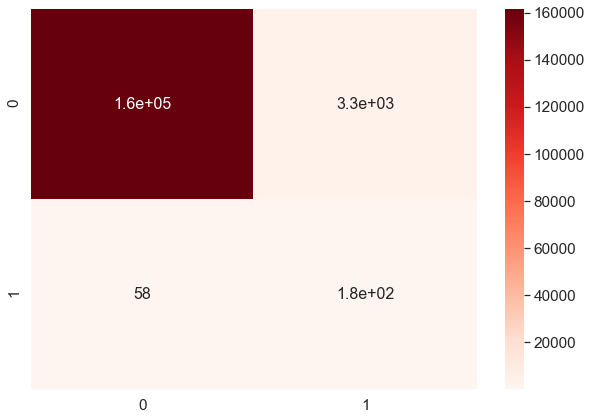

In [116]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[161603,   3294],
        [    58,    176]]

df_cm = pd.DataFrame(array, range(2), range(2))
plt.figure(figsize=(10,7))
# sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap=plt.cm.Reds) # font size



plt.show()

In [15]:
individuals_rc = get_k_best_individuals(res_cc_m[0].population, 3)
n_i = 1
for ind in individuals_rc:
    refine, transfer = get_refine_transfer(ind, source, target, 'nell_sports', 'nell_finances')
    print("INDIVIDUO ", n_i)
    print("REFINE: ", refine)
    print("TRANSFER: ", transfer)
    print("==========================")
    n_i += 1


INDIVIDUO  1
REFINE:  ['0;;teamplayssport00(A,B):- athleteplayssport01(B, C);true;false', '0;true;athleteledsportsteam02(C, D).;true;true', '0;true,true;teamplaysinleague03(E, A), teamplaysinleague04(E, D).;true;true', '0;true,true,true;athleteplaysforteam04(C, D).;false;false', '0;true,true,false;teamplaysagainstteam05(A, F), athleteplaysforteam06(G, A).;false;false', '0;true,false;teamplaysinleague06(H, A), teamalsoknownas07(I, A).;false;false', '1;;teamplayssport10(A,B):- athleteplayssport11(B, C), athleteplaysinleague11(C, D);true;true', '1;true;athleteledsportsteam12(C, E).;true;true', '1;true,true;teamplaysagainstteam13(F, A), teamalsoknownas14(G, F).;false;false', '1;true,false;teamplaysinleague14(A, H), athleteplaysinleague15(I, H).;true;false', '1;true,false,true;teamplaysagainstteam15(A, J).;false;false', '1;false;teamplaysinleague16(A, K).;false;true', '1;false,false;athleteplayssport17(L, B).;false;true', '1;false,false,false;teamplaysagainstteam18(A, M), teamalsoknownas19(

# ===============================

In [35]:
start = time.time()
res_ccc_a = genetic(new_src_struct, target, source, train_pos, 
                                         train_neg, train_facts, kb_source, kb_target, pred_target,
                                          NUM_GEN=14, pop_size=30, crossover_type='tree_ind', revision='random')
print("FIM DO GROOT GENETIC: ", time.time()-start)

GENERATION:  0
MELHOR RESULTADO:  -0.3302923373789498
BEST: {'m_auc_pr': 0.2778625, 'm_auc_roc': 0.9849785, 'm_cll': -0.178565, 'm_rec': 0.9191180000000001, 'm_pred': 0.259934, 'm_f1': 0.038895, 's_auc_pr': 0.019677500000000014, 's_auc_roc': 6.850000000002687e-05, 's_cll': 0.0013249999999999929, 's_rec': 0.007352999999999998, 's_prec': 0.24006602129518453, 's_f1': 0.000281}
GENERATION:  1
MELHOR RESULTADO:  -0.3302923373789498
BEST: {'m_auc_pr': 0.2778625, 'm_auc_roc': 0.9849785, 'm_cll': -0.178565, 'm_rec': 0.9191180000000001, 'm_pred': 0.259934, 'm_f1': 0.038895, 's_auc_pr': 0.019677500000000014, 's_auc_roc': 6.850000000002687e-05, 's_cll': 0.0013249999999999929, 's_rec': 0.007352999999999998, 's_prec': 0.24006602129518453, 's_f1': 0.000281}
GENERATION:  2
MELHOR RESULTADO:  -0.3433749435387649
BEST: {'m_auc_pr': 0.267812, 'm_auc_roc': 0.9809135, 'm_cll': -0.2149025, 'm_rec': 0.8970585, 'm_pred': 0.261618, 'm_f1': 0.0452985, 's_auc_pr': 0.004672999999999983, 's_auc_roc': 0.0011364999

In [36]:
res_ccc_a

(<src.s_genetic.population.Population at 0x7f96fb55c240>,
 [-0.3302923373789498,
  -0.3302923373789498,
  -0.3433749435387649,
  -0.3433749435387649,
  -0.3690393357597534,
  -0.3690393357597534,
  -0.3690393357597534,
  -0.3690393357597534,
  -0.3690393357597534,
  -0.3690393357597534,
  -0.3690393357597534,
  -0.3690393357597534,
  -0.3690393357597534],
 [{'m_auc_pr': 0.2778625,
   'm_auc_roc': 0.9849785,
   'm_cll': -0.178565,
   'm_rec': 0.9191180000000001,
   'm_pred': 0.259934,
   'm_f1': 0.038895,
   's_auc_pr': 0.019677500000000014,
   's_auc_roc': 6.850000000002687e-05,
   's_cll': 0.0013249999999999929,
   's_rec': 0.007352999999999998,
   's_prec': 0.24006602129518453,
   's_f1': 0.000281},
  {'m_auc_pr': 0.2778625,
   'm_auc_roc': 0.9849785,
   'm_cll': -0.178565,
   'm_rec': 0.9191180000000001,
   'm_pred': 0.259934,
   'm_f1': 0.038895,
   's_auc_pr': 0.019677500000000014,
   's_auc_roc': 6.850000000002687e-05,
   's_cll': 0.0013249999999999929,
   's_rec': 0.007352999999

In [37]:
individuals_rc = get_k_best_individuals(res_ccc_a[0].population, 3)
n_i = 1
for ind in individuals_rc:
    refine, transfer = get_refine_transfer(ind, source, target, 'nell_sports', 'nell_finances')
    print("INDIVIDUO ", n_i)
    print("REFINE: ", refine)
    print("TRANSFER: ", transfer)
    print("==========================")
    n_i += 1


INDIVIDUO  1
REFINE:  ['0;;teamplayssport00(A,B):- athleteplayssport01(C, B);true;false', '0;true;athleteledsportsteam02(C, D).;true;true', '0;true,true;teamplaysinleague03(E, A), teamplaysinleague04(E, D).;true;false', '0;true,true,true;athleteplaysforteam04(C, D).;false;false', '0;true,false;teamplaysagainstteam05(H, A), athleteplaysinleague06(C, I).;true;true', '0;true,false,true;athleteplaysforteam06(J, H), athleteplaysinleague07(I, J).;false;false', '0;true,false,false;teamalsoknownas07(K, A).;false;false', '1;;teamplayssport10(A,B):- athleteplayssport11(C, B), athleteplaysinleague11(D, C);false;true', '1;false;teamplaysinleague12(K, A).;false;true', '1;false,false;athleteplayssport13(B, L).;false;true', '1;false,false,false;teamplaysagainstteam14(A, M), teamalsoknownas15(A, N).;false;false', '2;;teamplayssport20(A,B):- athleteplayssport21(C, B), athleteplaysinleague21(C, D);true;true', '2;true;teamplaysagainstteam22(E, A), teamplaysinleague23(A, F).;false;true', '2;true,false;tea

In [38]:
# final_results[f'groot_test:{source}->{target}'] = []
# final_results[f'groot_test_rev:{source}->{target}'] = []
# final_results[f'inf_res:{source}->{target}'] = []
# final_results[f'inf_res_rev:{source}->{target}'] = []

# uwcse_dataset = datasets.load('uwcse', kb_target, target=target, seed=441773)
# train_facts, train_pos, train_neg, test_facts, test_pos, test_neg = get_train_test(uwcse_dataset, 1)
# tr_train_pos = []
# tr_train_neg = []
# tr_train_facts = []

# for i in range(0, len(train_pos)):
#     tr_train_pos.extend(train_pos[i])
#     tr_train_neg.extend(train_neg[i])
#     tr_train_facts.extend(train_facts[i])

# train = [tr_train_pos, tr_train_neg, tr_train_facts]
test = [test_pos, test_neg, test_facts[0]]

individuals = get_k_best_individuals(res_ccc_a[0].population, 3)

n_ind = 1
for individual in individuals:
    print("INDIVIDUO ", n_ind)
    refine, transfer = get_refine_transfer(individual, source, target, 'yago2s', 'nell_finances')
    for i in range(len(train_pos)):
        ttrain = [train_pos[i], train_neg[i][:2*len(train_pos[i])], train_facts[i]]
        res_ = test_refine_transfer(kb_target, target, refine, transfer, ttrain, test)
        print(res_)
#         final_results[f'groot_test:{source}->{target}'].append(res)
#         import os
    #     thisFile = f'boostsrl/best/test/results_{target.replace('recursion_', '')}.db'
    #     thisFile = f'boostsrl/best/test/results_{target}.db'
    #     base = os.path.splitext(thisFile)[0]
    #     os.rename(thisFile, base + ".txt")
    #     tt = open('boostsrl/best/test/results_advisedby.txt', 'r').readlines()
    #     final = []
    #     for i in tt:
    #         final.append(i.replace('\n', ''))
    #     final_results[f'inf_res:{source}->{target}'].append(final)
        print("===========================================================================")
#         break

    n_ind += 1

INDIVIDUO  1
({'AUC ROC': 0.50504, 'AUC PR': 0.001459, 'CLL': -0.370029, 'Precision': [nan, 0.5], 'Recall': 0.0, 'F1': nan}, <boostsrl.boostsrl.test object at 0x7f970206da90>)
({'AUC ROC': 0.485351, 'AUC PR': 0.001389, 'CLL': -0.368883, 'Precision': [nan, 0.5], 'Recall': 0.0, 'F1': nan}, <boostsrl.boostsrl.test object at 0x7f970358ff98>)
INDIVIDUO  2
({'AUC ROC': 0.50504, 'AUC PR': 0.001459, 'CLL': -0.370029, 'Precision': [nan, 0.5], 'Recall': 0.0, 'F1': nan}, <boostsrl.boostsrl.test object at 0x7f970206da90>)
({'AUC ROC': 0.485351, 'AUC PR': 0.001389, 'CLL': -0.368883, 'Precision': [nan, 0.5], 'Recall': 0.0, 'F1': nan}, <boostsrl.boostsrl.test object at 0x7f970358fb38>)
INDIVIDUO  3
({'AUC ROC': 0.50504, 'AUC PR': 0.001459, 'CLL': -0.370029, 'Precision': [nan, 0.5], 'Recall': 0.0, 'F1': nan}, <boostsrl.boostsrl.test object at 0x7f970206da90>)
({'AUC ROC': 0.485351, 'AUC PR': 0.001389, 'CLL': -0.368883, 'Precision': [nan, 0.5], 'Recall': 0.0, 'F1': nan}, <boostsrl.boostsrl.test object 

# ===============================


In [39]:
start = time.time()
res_ccc_g = genetic(new_src_struct, target, source, train_pos, 
                                         train_neg, train_facts, kb_source, kb_target, pred_target,
                                          NUM_GEN=14, pop_size=30, crossover_type='tree_ind', revision='guided')
print("FIM DO GROOT GENETIC: ", time.time()-start)

GENERATION:  0
MELHOR RESULTADO:  -0.2693902869704103
BEST: {'m_auc_pr': 0.057533, 'm_auc_roc': 0.9774035000000001, 'm_cll': -0.263175, 'm_rec': 0.6231614999999999, 'm_pred': 0.28888424999999995, 'm_f1': 0.1382805, 's_auc_pr': 0.004451, 's_auc_roc': 0.0016484999999999972, 's_cll': 0.00031799999999998496, 's_rec': 0.005514500000000033, 's_prec': 0.21111595938769645, 's_f1': 0.0008005000000000095}
GENERATION:  1
MELHOR RESULTADO:  -0.2693902869704103
BEST: {'m_auc_pr': 0.057533, 'm_auc_roc': 0.9774035000000001, 'm_cll': -0.263175, 'm_rec': 0.6231614999999999, 'm_pred': 0.28888424999999995, 'm_f1': 0.1382805, 's_auc_pr': 0.004451, 's_auc_roc': 0.0016484999999999972, 's_cll': 0.00031799999999998496, 's_rec': 0.005514500000000033, 's_prec': 0.21111595938769645, 's_f1': 0.0008005000000000095}
GENERATION:  2
MELHOR RESULTADO:  -0.2693902869704103
BEST: {'m_auc_pr': 0.057533, 'm_auc_roc': 0.9774035000000001, 'm_cll': -0.263175, 'm_rec': 0.6231614999999999, 'm_pred': 0.28888424999999995, 'm_f1'

In [40]:
res_ccc_g

(<src.s_genetic.population.Population at 0x7f96f9fc4eb8>,
 [-0.2693902869704103,
  -0.2693902869704103,
  -0.2693902869704103,
  -0.3448502401612184,
  -0.36947400855066925,
  -0.36947400855066925,
  -0.36947400855066925,
  -0.36947400855066925,
  -0.36947400855066925,
  -0.36947400855066925,
  -0.36947400855066925,
  -0.36947400855066925,
  -0.36947400855066925],
 [{'m_auc_pr': 0.057533,
   'm_auc_roc': 0.9774035000000001,
   'm_cll': -0.263175,
   'm_rec': 0.6231614999999999,
   'm_pred': 0.28888424999999995,
   'm_f1': 0.1382805,
   's_auc_pr': 0.004451,
   's_auc_roc': 0.0016484999999999972,
   's_cll': 0.00031799999999998496,
   's_rec': 0.005514500000000033,
   's_prec': 0.21111595938769645,
   's_f1': 0.0008005000000000095},
  {'m_auc_pr': 0.057533,
   'm_auc_roc': 0.9774035000000001,
   'm_cll': -0.263175,
   'm_rec': 0.6231614999999999,
   'm_pred': 0.28888424999999995,
   'm_f1': 0.1382805,
   's_auc_pr': 0.004451,
   's_auc_roc': 0.0016484999999999972,
   's_cll': 0.00031799

In [41]:
individuals_rc = get_k_best_individuals(res_ccc_g[0].population, 3)
n_i = 1
for ind in individuals_rc:
    refine, transfer = get_refine_transfer(ind, source, target, 'nell_sports', 'nell_finances')
    print("INDIVIDUO ", n_i)
    print("REFINE: ", refine)
    print("TRANSFER: ", transfer)
    print("==========================")
    n_i += 1


INDIVIDUO  1
REFINE:  ['0;;teamplayssport00(A,B):- athleteplayssport01(C, B);true;false', '0;true;athleteledsportsteam02(C, D).;true;true', '0;true,true;teamplaysinleague03(A, E), teamplaysinleague04(E, D).;true;true', '0;true,true,true;athleteplaysforteam04(C, D).;false;false', '0;true,true,false;teamplaysagainstteam05(A, F), athleteplaysforteam06(G, A).;false;false', '0;true,false;teamplaysagainstteam06(H, A), athleteplaysinleague07(I, C).;true;false', '0;true,false,true;athleteplaysforteam07(J, H), athleteplaysinleague08(J, I).;false;false', '1;;teamplayssport10(A,B):- athleteplayssport11(C, B), athleteplaysinleague11(D, C);true;true', '1;true;athleteledsportsteam12(C, E).;true;true', '1;true,true;teamplaysagainstteam13(F, A), teamalsoknownas14(G, F).;false;false', '1;true,false;teamplaysinleague14(A, H), athleteplaysinleague15(H, I).;true;false', '1;true,false,true;teamplaysagainstteam15(A, J).;false;false', '1;false;teamplaysinleague16(K, A).;true;true', '1;false,true;bankchiefexe

In [42]:
# final_results[f'groot_test:{source}->{target}'] = []
# final_results[f'groot_test_rev:{source}->{target}'] = []
# final_results[f'inf_res:{source}->{target}'] = []
# final_results[f'inf_res_rev:{source}->{target}'] = []

# uwcse_dataset = datasets.load('uwcse', kb_target, target=target, seed=441773)
# train_facts, train_pos, train_neg, test_facts, test_pos, test_neg = get_train_test(uwcse_dataset, 1)
# tr_train_pos = []
# tr_train_neg = []
# tr_train_facts = []

# for i in range(0, len(train_pos)):
#     tr_train_pos.extend(train_pos[i])
#     tr_train_neg.extend(train_neg[i])
#     tr_train_facts.extend(train_facts[i])

# train = [tr_train_pos, tr_train_neg, tr_train_facts]
test = [test_pos, test_neg, test_facts[0]]

individuals = get_k_best_individuals(res_ccc_g[0].population, 3)

n_ind = 1
for individual in individuals:
    print("INDIVIDUO ", n_ind)
    refine, transfer = get_refine_transfer(individual, source, target, 'yago2s', 'nell_finances')
    for i in range(len(train_pos)):
        ttrain = [train_pos[i], train_neg[i][:2*len(train_pos[i])], train_facts[i]]
        res_ = test_refine_transfer(kb_target, target, refine, transfer, ttrain, test)
        print(res_)
#         final_results[f'groot_test:{source}->{target}'].append(res)
#         import os
    #     thisFile = f'boostsrl/best/test/results_{target.replace('recursion_', '')}.db'
    #     thisFile = f'boostsrl/best/test/results_{target}.db'
    #     base = os.path.splitext(thisFile)[0]
    #     os.rename(thisFile, base + ".txt")
    #     tt = open('boostsrl/best/test/results_advisedby.txt', 'r').readlines()
    #     final = []
    #     for i in tt:
    #         final.append(i.replace('\n', ''))
    #     final_results[f'inf_res:{source}->{target}'].append(final)
        print("===========================================================================")
#         break

    n_ind += 1

INDIVIDUO  1
({'AUC ROC': 0.520196, 'AUC PR': 0.001568, 'CLL': -0.368893, 'Precision': [nan, 0.5], 'Recall': 0.0, 'F1': nan}, <boostsrl.boostsrl.test object at 0x7f96fb628160>)
({'AUC ROC': 0.476338, 'AUC PR': 0.001346, 'CLL': -0.368584, 'Precision': [nan, 0.5], 'Recall': 0.0, 'F1': nan}, <boostsrl.boostsrl.test object at 0x7f96fd536e48>)
INDIVIDUO  2
({'AUC ROC': 0.520196, 'AUC PR': 0.001568, 'CLL': -0.368893, 'Precision': [nan, 0.5], 'Recall': 0.0, 'F1': nan}, <boostsrl.boostsrl.test object at 0x7f96fb628160>)
({'AUC ROC': 0.476338, 'AUC PR': 0.001346, 'CLL': -0.368584, 'Precision': [nan, 0.5], 'Recall': 0.0, 'F1': nan}, <boostsrl.boostsrl.test object at 0x7f96fb4cdc18>)
INDIVIDUO  3
({'AUC ROC': 0.520196, 'AUC PR': 0.001568, 'CLL': -0.368893, 'Precision': [nan, 0.5], 'Recall': 0.0, 'F1': nan}, <boostsrl.boostsrl.test object at 0x7f96fb628160>)
({'AUC ROC': 0.476338, 'AUC PR': 0.001346, 'CLL': -0.368584, 'Precision': [nan, 0.5], 'Recall': 0.0, 'F1': nan}, <boostsrl.boostsrl.test obje

In [43]:
start = time.time()
res_ccc_m = genetic(new_src_struct, target, source, train_pos, 
                                         train_neg, train_facts, kb_source, kb_target, pred_target,
                                          NUM_GEN=14, pop_size=30, crossover_type='tree_ind', revision='mixed')
print("FIM DO GROOT GENETIC: ", time.time()-start)

GENERATION:  0
MELHOR RESULTADO:  -0.2476621130673806
BEST: {'m_auc_pr': 0.1003, 'm_auc_roc': 0.9780945000000001, 'm_cll': -0.226443, 'm_rec': 0.49816150000000003, 'm_pred': 0.27904075, 'm_f1': 0.1040185, 's_auc_pr': 0.005554000000000003, 's_auc_roc': 0.0012355000000000005, 's_cll': 0.0010379999999999973, 's_rec': 0.0055145000000000055, 's_prec': 0.22096226900013383, 's_f1': 0.0024995000000000017}
GENERATION:  1
MELHOR RESULTADO:  -0.2602854594887121
BEST: {'m_auc_pr': 0.0497485, 'm_auc_roc': 0.9628265, 'm_cll': -0.255487, 'm_rec': 0.43382350000000003, 'm_pred': 0.2863515, 'm_f1': 0.1232235, 's_auc_pr': 0.005742499999999998, 's_auc_roc': 0.0008024999999999839, 's_cll': 0.0013279999999999959, 's_rec': 0.018382499999999996, 's_prec': 0.21403600344392995, 's_f1': 0.025951500000000002}
GENERATION:  2
MELHOR RESULTADO:  -0.26945983327251205
BEST: {'m_auc_pr': 0.0483585, 'm_auc_roc': 0.967415, 'm_cll': -0.265085, 'm_rec': 0.836397, 'm_pred': 0.26165700000000003, 'm_f1': 0.0453635, 's_auc_pr'

In [44]:
res_ccc_m

(<src.s_genetic.population.Population at 0x7f96fb55c128>,
 [-0.2476621130673806,
  -0.2602854594887121,
  -0.26945983327251205,
  -0.37863802962195964,
  -0.37863802962195964,
  -0.457732543274181,
  -0.457732543274181,
  -0.457732543274181,
  -0.457732543274181,
  -0.457732543274181,
  -0.4673499012314007,
  -0.4673499012314007,
  -0.4673499012314007,
  -0.4673499012314007,
  -0.4673499012314007],
 [{'m_auc_pr': 0.1003,
   'm_auc_roc': 0.9780945000000001,
   'm_cll': -0.226443,
   'm_rec': 0.49816150000000003,
   'm_pred': 0.27904075,
   'm_f1': 0.1040185,
   's_auc_pr': 0.005554000000000003,
   's_auc_roc': 0.0012355000000000005,
   's_cll': 0.0010379999999999973,
   's_rec': 0.0055145000000000055,
   's_prec': 0.22096226900013383,
   's_f1': 0.0024995000000000017},
  {'m_auc_pr': 0.0497485,
   'm_auc_roc': 0.9628265,
   'm_cll': -0.255487,
   'm_rec': 0.43382350000000003,
   'm_pred': 0.2863515,
   'm_f1': 0.1232235,
   's_auc_pr': 0.005742499999999998,
   's_auc_roc': 0.00080249999

In [45]:
individuals_rc = get_k_best_individuals(res_ccc_m[0].population, 3)
n_i = 1
for ind in individuals_rc:
    refine, transfer = get_refine_transfer(ind, source, target, 'nell_sports', 'nell_finances')
    print("INDIVIDUO ", n_i)
    print("REFINE: ", refine)
    print("TRANSFER: ", transfer)
    print("==========================")
    n_i += 1


INDIVIDUO  1
REFINE:  ['0;;teamplayssport00(A,B):- athleteplayssport01(B, C);true;false', '0;true;athleteledsportsteam02(C, D).;true;true', '0;true,true;athleteledsportsteam03(C, E).;true;false', '0;true,true,true;teamplaysinleague04(F, A), teamplaysinleague05(F, E).;true;true', '0;true,true,true,true;companyceotarget05(B, E), economicsectorcompanytarget06(L, E).;false;false', '0;true,true,true,false;athleteplaysforteam06(C, G), teamalsoknownas07(E, G).;false;false', '0;true,false;teamplaysagainstteam07(H, A), athleteplaysinleague08(C, I).;true;true', '0;true,false,true;athleteplaysforteam08(J, H), athleteplaysinleague09(I, J).;false;false', '0;true,false,false;teamalsoknownas09(K, A).;false;true', '0;true,false,false,false;bankchiefexecutiveceotarget010(I, C).;false;false', '1;;teamplayssport10(A,B):- athleteplayssport11(B, C), athleteplaysinleague11(D, C);true;false', '1;true;athleteledsportsteam12(C, E).;true;false', '1;true,true;teamplaysagainstteam13(F, A), teamalsoknownas14(G, F)

In [46]:
# final_results[f'groot_test:{source}->{target}'] = []
# final_results[f'groot_test_rev:{source}->{target}'] = []
# final_results[f'inf_res:{source}->{target}'] = []
# final_results[f'inf_res_rev:{source}->{target}'] = []

# uwcse_dataset = datasets.load('uwcse', kb_target, target=target, seed=441773)
# train_facts, train_pos, train_neg, test_facts, test_pos, test_neg = get_train_test(uwcse_dataset, 1)
# tr_train_pos = []
# tr_train_neg = []
# tr_train_facts = []

# for i in range(0, len(train_pos)):
#     tr_train_pos.extend(train_pos[i])
#     tr_train_neg.extend(train_neg[i])
#     tr_train_facts.extend(train_facts[i])

# train = [tr_train_pos, tr_train_neg, tr_train_facts]
test = [test_pos, test_neg, test_facts[0]]

individuals = get_k_best_individuals(res_ccc_m[0].population, 3)

n_ind = 1
for individual in individuals:
    print("INDIVIDUO ", n_ind)
    refine, transfer = get_refine_transfer(individual, source, target, 'yago2s', 'nell_finances')
    for i in range(len(train_pos)):
        ttrain = [train_pos[i], train_neg[i][:2*len(train_pos[i])], train_facts[i]]
        res_ = test_refine_transfer(kb_target, target, refine, transfer, ttrain, test)
        print(res_)
#         final_results[f'groot_test:{source}->{target}'].append(res)
#         import os
    #     thisFile = f'boostsrl/best/test/results_{target.replace('recursion_', '')}.db'
    #     thisFile = f'boostsrl/best/test/results_{target}.db'
    #     base = os.path.splitext(thisFile)[0]
    #     os.rename(thisFile, base + ".txt")
    #     tt = open('boostsrl/best/test/results_advisedby.txt', 'r').readlines()
    #     final = []
    #     for i in tt:
    #         final.append(i.replace('\n', ''))
    #     final_results[f'inf_res:{source}->{target}'].append(final)
        print("===========================================================================")
#         break

    n_ind += 1

INDIVIDUO  1
({'AUC ROC': 0.996863, 'AUC PR': 0.407546, 'CLL': -0.14655, 'Precision': [0.027184, 0.5], 'Recall': 1.0, 'F1': 0.052929}, <boostsrl.boostsrl.test object at 0x7f96f9cb6f60>)
({'AUC ROC': 0.996909, 'AUC PR': 0.427482, 'CLL': -0.148682, 'Precision': [0.027184, 0.5], 'Recall': 1.0, 'F1': 0.052929}, <boostsrl.boostsrl.test object at 0x7f96f9cb69e8>)
INDIVIDUO  2
({'AUC ROC': 0.996863, 'AUC PR': 0.407546, 'CLL': -0.14655, 'Precision': [0.027184, 0.5], 'Recall': 1.0, 'F1': 0.052929}, <boostsrl.boostsrl.test object at 0x7f96f9cb6240>)
({'AUC ROC': 0.996909, 'AUC PR': 0.427482, 'CLL': -0.148682, 'Precision': [0.027184, 0.5], 'Recall': 1.0, 'F1': 0.052929}, <boostsrl.boostsrl.test object at 0x7f96f9cb6f60>)
INDIVIDUO  3
({'AUC ROC': 0.996863, 'AUC PR': 0.407546, 'CLL': -0.14655, 'Precision': [0.027184, 0.5], 'Recall': 1.0, 'F1': 0.052929}, <boostsrl.boostsrl.test object at 0x7f96f9cb6a90>)
({'AUC ROC': 0.996909, 'AUC PR': 0.427482, 'CLL': -0.148682, 'Precision': [0.027184, 0.5], 'Re

## ================================

In [60]:
tr_train_pos = []
tr_train_neg = []
tr_train_facts = []

for i in range(0, len(train_pos)):
    tr_train_pos.extend(train_pos[i])
    tr_train_neg.extend(train_neg[i])
    tr_train_facts.extend(train_facts[i])
aa = []
for i in range(0, len(train_pos)):
    train = [train_pos[i], train_neg[i][:2*len(train_pos[i])], train_facts[i]]
#     aa = test_tree_b(source, target, kb_source, kb_target, structured_src, train, test)
    aa.append(test_tree_b(source, target, kb_source, kb_target, structured_src, train, test))

******************************************
Performing Parameter Learning
******************************************
Refine
['teamplayssport(A, B)', {'': 'athleteplayssport(C, B)', 'true': 'athleteledsportsteam(C, D)', 'true,true': 'teamplaysinleague(A, E), teamplaysinleague(D, E)', 'true,true,true': 'athleteplaysforteam(C, D)', 'true,true,false': 'teamplaysagainstteam(A, F), athleteplaysforteam(G, A)', 'true,false': 'teamplaysagainstteam(H, A), athleteplaysinleague(C, I)', 'true,false,true': 'athleteplaysforteam(J, H), athleteplaysinleague(J, I)', 'true,false,false': 'teamalsoknownas(K, A)'}, {'true,true,true,true': [1.08e-06, 0, 235], 'true,true,true,false': [0.943, 1, 8], 'true,true,false,true': [1.604, 3, 18], 'true,true,false,false': [1.966, 4, 113], 'true,false,true,true': [0.816, 1, 2], 'true,false,true,false': [0.0, 0, 13], 'true,false,false,true': [0.866, 1, 3], 'true,false,false,false': [1.095, 3, 2], 'false': [0.062, 781, 3]}]
['teamplayssport(A, B)', {'': 'athleteplayssport(

WILL Produced-Tree #1
% FOR companyeconomicsector(A, B):
%   if ( economicsectorcompany(B, C) )
%   then if ( acquired(D, C) )
%   | then if ( bankchiefexecutiveceo(A, E), bankchiefexecutiveceo(D, E) )
%   | | then return 0;  // std dev = 0,000, 0,000 (wgt'ed) examples reached here.
%   | | else if ( companyalsoknownas(A, F) )
%   | | | then return 0.6968586125188665;  // std dev = 2,048, 31,000 (wgt'ed) examples reached here.  /* #neg=5 #pos=26 */
%   | | | else return 0.7590498360004099;  // std dev = 4,452, 222,000 (wgt'ed) examples reached here.  /* #neg=22 #pos=200 */
%   | else if ( companyalsoknownas(G, A), companyceo(C, H) )
%   | | then if ( companyceo(I, H) )
%   | | | then return 0.8581489350995123;  // std dev = 0,000, 7,000 (wgt'ed) examples reached here.  /* #pos=7 */
%   | | | else return 0;  // std dev = 0,000, 0,000 (wgt'ed) examples reached here.
%   | | else if ( bankboughtbank(J, A) )
%   | | | then return -0.14185106490048777;  // std dev = 0,000, 2,000 (wgt'ed) ex

Results
   AUC ROC   = 0.972346
   AUC PR    = 0.031237
   CLL	      = -0.169446
   Precision = 0.021396 at threshold = 0.5
   Recall    = 0.846154
   F1        = 0.041737


Total learning time: 12.169 seconds
Total inference time: 24.562 seconds
AUC ROC: 0.972346


Results scoring model
   AUC ROC   = 0.967128
   AUC PR    = 0.902381
   CLL	      = -0.238507
   Precision = 0.841727 at threshold = 0.5
   Recall    = 0.860294
   F1        = 0.850909


Total scoring time: 2.364 seconds
Parameter learned model CLL: -0.238507


Structure after Parameter Learning
[['companyeconomicsector(A, B)', {'': 'economicsectorcompany(B, C)', 'true': 'acquired(D, C)', 'true,true': 'bankchiefexecutiveceo(A, E), bankchiefexecutiveceo(D, E)', 'true,true,false': 'companyalsoknownas(A, F)', 'true,false': 'companyalsoknownas(G, A), companyceo(C, H)', 'true,false,true': 'companyceo(I, H)', 'true,false,false': 'bankboughtbank(J, A)'}, {'true,true,true': [0.0, 0, 0], 'true,true,false,true': [2.048, 5, 26], 'tru

WILL Produced-Tree #1
% FOR companyeconomicsector(A, B):
%   if ( economicsectorcompany(B, C) )
%   then if ( acquired(D, C) )
%   | then if ( economicsectorcompany(B, A) )
%   | | then return 0.858148935099509;  // std dev = 1,07e-06, 226,000 (wgt'ed) examples reached here.  /* #pos=226 */
%   | | else return -0.1418510649004877;  // std dev = 2,36e-08, 27,000 (wgt'ed) examples reached here.  /* #neg=27 */
%   | else if ( companyalsoknownas(E, A), companyceo(C, F) )
%   | | then return 0.8581489350995123;  // std dev = 0,000, 7,000 (wgt'ed) examples reached here.  /* #pos=7 */
%   | | else if ( bankboughtbank(G, A) )
%   | | | then return -0.14185106490048777;  // std dev = 0,000, 2,000 (wgt'ed) examples reached here.  /* #neg=2 */
%   | | | else return 0.35814893509951157;  // std dev = 4,416, 78,000 (wgt'ed) examples reached here.  /* #neg=39 #pos=39 */
%   else return -0.14185106490048746;  // std dev = 1,88e-07, 476,000 (wgt'ed) examples reached here.  /* #neg=476 */
WILL Produced

Results
   AUC ROC   = 1.0
   AUC PR    = 1.0
   CLL	      = -0.066532
   Precision = 1.0 at threshold = 0.5
   Recall    = 1.0
   F1        = 1.0


Total learning time: 14.707 seconds
Total inference time: 15.523 seconds
AUC ROC: 1.0


Results scoring model
   AUC ROC   = 1.0
   AUC PR    = 1.0
   CLL	      = -0.088875
   Precision = 1.0 at threshold = 0.5
   Recall    = 1.0
   F1        = 1.0


Total scoring time: 1.329 seconds
Refined model CLL: -0.088875


Refining iteration 2
********************************
Candidate for revision
0;;companyeconomicsector(A, B) :- economicsectorcompany(B, C).;true;true
0;true;acquired(D, C).;true;true
0;true,true;economicsectorcompany(B, A).;true;true
0;true,false;companyalsoknownas(E, A), companyceo(C, F).;true;true
0;true,false,false;bankboughtbank(G, A).;true;true
1;;companyeconomicsector(A, B) :- economicsectorcompany(B, C), companyceo(C, D).;true;true
1;true;economicsectorcompany(B, A).;true;true
1;false;bankchiefexecutiveceo(A, E).;true;true

Results
   AUC ROC   = 1.0
   AUC PR    = 1.0
   CLL	      = -0.06657
   Precision = 1.0 at threshold = 0.5
   Recall    = 1.0
   F1        = 1.0


Total learning time: 4.918 seconds
Total inference time: 16.233 seconds
AUC ROC: 1.0


Results scoring model
   AUC ROC   = 1.0
   AUC PR    = 1.0
   CLL	      = -0.08872
   Precision = 1.0 at threshold = 0.5
   Recall    = 1.0
   F1        = 1.0


Total scoring time: 1.464 seconds
Refined model CLL: -0.08872


Refining iteration 3
********************************
Candidate for revision
0;;companyeconomicsector(A, B) :- economicsectorcompany(B, C).;true;true
0;true;acquired(D, C).;true;true
0;true,true;economicsectorcompany(B, A).;true;true
0;true,false;companyalsoknownas(E, A), companyceo(C, F).;true;true
0;true,false,false;bankboughtbank(G, A).;true;true
1;;companyeconomicsector(A, B) :- economicsectorcompany(B, C), companyceo(C, D).;true;true
1;true;economicsectorcompany(B, A).;true;true
1;false;bankchiefexecutiveceo(A, E).;true;true
1;f

Results
   AUC ROC   = 1.0
   AUC PR    = 1.0
   CLL	      = -0.065271
   Precision = 1.0 at threshold = 0.5
   Recall    = 1.0
   F1        = 1.0


Total learning time: 4.11 seconds
Total inference time: 16.335 seconds
AUC ROC: 1.0


Results scoring model
   AUC ROC   = 1.0
   AUC PR    = 1.0
   CLL	      = -0.087179
   Precision = 1.0 at threshold = 0.5
   Recall    = 1.0
   F1        = 1.0


Total scoring time: 1.525 seconds
Refined model CLL: -0.087179


Refining iteration 4
********************************
Candidate for revision
0;;companyeconomicsector(A, B) :- economicsectorcompany(B, C).;true;true
0;true;acquired(D, C).;true;true
0;true,true;economicsectorcompany(B, A).;true;true
0;true,false;companyalsoknownas(E, A), companyceo(C, F).;true;true
0;true,false,false;bankboughtbank(G, A).;true;true
1;;companyeconomicsector(A, B) :- economicsectorcompany(B, C), companyceo(C, D).;true;true
1;true;economicsectorcompany(B, A).;true;true
1;false;bankchiefexecutiveceo(A, E).;true;true
1

Results
   AUC ROC   = 1.0
   AUC PR    = 1.0
   CLL	      = -0.064301
   Precision = 1.0 at threshold = 0.5
   Recall    = 1.0
   F1        = 1.0


Total learning time: 4.212 seconds
Total inference time: 16.434 seconds
AUC ROC: 1.0


Results scoring model
   AUC ROC   = 1.0
   AUC PR    = 1.0
   CLL	      = -0.085545
   Precision = 1.0 at threshold = 0.5
   Recall    = 1.0
   F1        = 1.0


Total scoring time: 1.554 seconds
Refined model CLL: -0.085545


Refining iteration 5
********************************
Candidate for revision
0;;companyeconomicsector(A, B) :- economicsectorcompany(B, C).;true;true
0;true;acquired(D, C).;true;true
0;true,true;economicsectorcompany(B, A).;true;true
0;true,false;companyalsoknownas(E, A), companyceo(C, F).;true;true
0;true,false,false;bankboughtbank(G, A).;true;true
1;;companyeconomicsector(A, B) :- economicsectorcompany(B, C), companyceo(C, D).;true;true
1;true;economicsectorcompany(B, A).;true;true
1;false;bankchiefexecutiveceo(A, E).;true;true


Results
   AUC ROC   = 1.0
   AUC PR    = 1.0
   CLL	      = -0.064301
   Precision = 1.0 at threshold = 0.5
   Recall    = 1.0
   F1        = 1.0


Total learning time: 4.733 seconds
Total inference time: 16.171 seconds
AUC ROC: 1.0


Results scoring model
   AUC ROC   = 1.0
   AUC PR    = 1.0
   CLL	      = -0.085545
   Precision = 1.0 at threshold = 0.5
   Recall    = 1.0
   F1        = 1.0


Total scoring time: 2.347 seconds
Refined model CLL: -0.085545


******************************************
Best model found
******************************************
Results
   AUC ROC   = 1.0
   AUC PR    = 1.0
   CLL	      = -0.064301
   Precision = 1.0 at threshold = 0.5
   Recall    = 1.0
   F1        = 1.0


Total learning time: 4.212 seconds
Total inference time: 16.434 seconds
AUC ROC: 1.0
Total revision time: 55.432
Best scored revision CLL: -0.085545


******************************************
Performing Parameter Learning
******************************************
Refine
['teamplay

WILL Produced-Tree #1
% FOR companyeconomicsector(A, B):
%   if ( economicsectorcompany(B, C) )
%   then if ( acquired(D, C) )
%   | then if ( companyalsoknownas(A, E) )
%   | | then return 0.7217852987358758;  // std dev = 1,610, 22,000 (wgt'ed) examples reached here.  /* #neg=3 #pos=19 */
%   | | else return 0.7783170023263997;  // std dev = 4,181, 238,000 (wgt'ed) examples reached here.  /* #neg=19 #pos=219 */
%   | else if ( companyalsoknownas(F, A), cityhascompanyoffice(G, C) )
%   | | then if ( cityhascompanyoffice(G, H) )
%   | | | then return 0.10814893509951219;  // std dev = 0,866, 4,000 (wgt'ed) examples reached here.  /* #neg=3 #pos=1 */
%   | | | else return 0;  // std dev = 0,000, 0,000 (wgt'ed) examples reached here.
%   | | else if ( bankboughtbank(I, A) )
%   | | | then return 0.19148226843284552;  // std dev = 0,816, 3,000 (wgt'ed) examples reached here.  /* #neg=2 #pos=1 */
%   | | | else return 0.3357608753980186;  // std dev = 4,089, 67,000 (wgt'ed) examples reache

Results
   AUC ROC   = 0.97542
   AUC PR    = 0.041164
   CLL	      = -0.164133
   Precision = 0.021351 at threshold = 0.5
   Recall    = 0.858974
   F1        = 0.041667


Total learning time: 74.386 seconds
Total inference time: 117.48400000000001 seconds
AUC ROC: 0.97542


Results scoring model
   AUC ROC   = 0.977617
   AUC PR    = 0.934533
   CLL	      = -0.210102
   Precision = 0.878136 at threshold = 0.5
   Recall    = 0.900735
   F1        = 0.889292


Total scoring time: 12.89 seconds
Parameter learned model CLL: -0.210102


Structure after Parameter Learning
[['companyeconomicsector(A, B)', {'': 'economicsectorcompany(B, C)', 'true': 'acquired(D, C)', 'true,true': 'companyalsoknownas(A, E)', 'true,false': 'companyalsoknownas(F, A), cityhascompanyoffice(G, C)', 'true,false,true': 'cityhascompanyoffice(G, H)', 'true,false,false': 'bankboughtbank(I, A)'}, {'true,true,true': [1.61, 3, 19], 'true,true,false': [4.181, 19, 219], 'true,false,true,true': [0.866, 3, 1], 'true,false,tru

WILL Produced-Tree #1
% FOR companyeconomicsector(A, B):
%   if ( economicsectorcompany(B, C) )
%   then if ( economicsectorcompany(B, A) )
%   | then return 0.8581489350995086;  // std dev = 1,08e-06, 272,000 (wgt'ed) examples reached here.  /* #pos=272 */
%   | else return -0.14185106490048766;  // std dev = 6,32e-08, 62,000 (wgt'ed) examples reached here.  /* #neg=62 */
%   else return -0.14185106490048754;  // std dev = 1,52e-07, 482,000 (wgt'ed) examples reached here.  /* #neg=482 */
WILL Produced-Tree #2
% FOR companyeconomicsector(A, B):
%   if ( economicsectorcompany(B, C), cityhascompanyoffice(D, C) )
%   then if ( economicsectorcompany(B, A) )
%   | then return 0.7194734122109574;  // std dev = 0,000, 245,000 (wgt'ed) examples reached here.  /* #pos=245 */
%   | else return -0.12544463852839144;  // std dev = 0,000, 34,000 (wgt'ed) examples reached here.  /* #neg=34 */
%   else if ( economicsectorcompany(B, E) )
%   | then if ( economicsectorcompany(B, A) )
%   | | then retur

Results scoring model
   AUC ROC   = 1.0
   AUC PR    = 1.0
   CLL	      = -0.08528
   Precision = 1.0 at threshold = 0.5
   Recall    = 1.0
   F1        = 1.0


Total scoring time: 1.327 seconds
Refined model CLL: -0.08528


Refining iteration 2
********************************
Candidate for revision
0;;companyeconomicsector(A, B) :- economicsectorcompany(B, C).;true;true
0;true;economicsectorcompany(B, A).;true;true
1;;companyeconomicsector(A, B) :- economicsectorcompany(B, C), cityhascompanyoffice(D, C).;true;true
1;true;economicsectorcompany(B, A).;true;true
1;false;economicsectorcompany(B, E).;true;true
1;false,true;economicsectorcompany(B, A).;true;true
2;;companyeconomicsector(A, B) :- economicsectorcompany(B, A).;true;true
3;;companyeconomicsector(A, B) :- economicsectorcompany(B, A).;true;true
4;;companyeconomicsector(A, B) :- economicsectorcompany(B, C).;true;true
4;true;acquired(D, C).;true;true
4;true,true;companyalsoknownas(A, D).;true;true
4;true,true,false;economicsector

Results
   AUC ROC   = 1.0
   AUC PR    = 1.0
   CLL	      = -0.063229
   Precision = 1.0 at threshold = 0.5
   Recall    = 1.0
   F1        = 1.0


Total learning time: 3.591 seconds
Total inference time: 10.701 seconds
AUC ROC: 1.0


Results scoring model
   AUC ROC   = 1.0
   AUC PR    = 1.0
   CLL	      = -0.08528
   Precision = 1.0 at threshold = 0.5
   Recall    = 1.0
   F1        = 1.0


Total scoring time: 1.29 seconds
Refined model CLL: -0.08528


******************************************
Best model found
******************************************
Results
   AUC ROC   = 1.0
   AUC PR    = 1.0
   CLL	      = -0.063229
   Precision = 1.0 at threshold = 0.5
   Recall    = 1.0
   F1        = 1.0


Total learning time: 9.955 seconds
Total inference time: 10.556 seconds
AUC ROC: 1.0
Total revision time: 103.439
Best scored revision CLL: -0.08528




In [65]:
background_knowledge_src = boostsrl.modes(kb_target, [target], useStdLogicVariables=False, 
                                      maxTreeDepth=3, nodeSize=2, numOfClauses=8)
sys.path.insert(0, '../TreeBoostler')

from revision import revision

def print_function(message):
        global experiment_title
        global nbr
        experiment_title = f'NellSports->NellFinances: {source}->{target}'
        nbr = 1
        if not os.path.exists('experiments/' + experiment_title):
            os.makedirs('experiments/' + experiment_title)
        with open('experiments/' + experiment_title + '/' + str(nbr) + '_' + experiment_title + '.txt', 'a') as f:
            print(message, file=f)
            print(message)
model = []
for i in range(0, len(train_pos)):
#     model = revision.learn_test_model(background_knowledge_src, boostsrl, target, tr_train_pos, tr_train_neg, tr_train_facts, test_pos, test_neg, test_facts[0], trees=10, print_function=print_function)
    model.append(revision.learn_test_model(background_knowledge_src, boostsrl, target, train_pos[i], train_neg[i][:2*len(train_pos[i])], train_facts[i], test_pos, test_neg, test_facts[0], trees=10, print_function=print_function))

WILL Produced-Tree #1
% FOR companyeconomicsector(A, B):
%   if ( economicsectorcompany(B, A) )
%   then return 0.8581489350995086;  // std dev = 1,08e-06, 272,000 (wgt'ed) examples reached here.  /* #pos=272 */
%   else return -0.14185106490048816;  // std dev = 0,000, 544,000 (wgt'ed) examples reached here.  /* #neg=544 */
WILL Produced-Tree #2
% FOR companyeconomicsector(A, B):
%   if ( economicsectorcompany(B, A) )
%   then return 0.7194734122109576;  // std dev = 0,000, 272,000 (wgt'ed) examples reached here.  /* #pos=272 */
%   else return -0.12544463852839233;  // std dev = 0,000, 544,000 (wgt'ed) examples reached here.  /* #neg=544 */
WILL Produced-Tree #3
% FOR companyeconomicsector(A, B):
%   if ( economicsectorcompany(B, A) )
%   then return 0.5553664367462832;  // std dev = 3,37e-07, 272,000 (wgt'ed) examples reached here.  /* #pos=272 */
%   else return -0.1123163781936057;  // std dev = 0,000, 544,000 (wgt'ed) examples reached here.  /* #neg=544 */
WILL Produced-Tree #4
%

In [69]:
model[0]

 {'AUC ROC': 1.0,
  'AUC PR': 1.0,
  'CLL': -0.062437,
  'Precision': [1.0, 0.5],
  'Recall': 1.0,
  'F1': 1.0,
  'Learning time': 5.206,
  'Inference time': 5.191},
 [['companyeconomicsector(A, B)',
   {'': 'economicsectorcompany(B, A)'},
   {'true': [1.08e-06, 0, 272], 'false': [0.0, 544, 0]}],
  ['companyeconomicsector(A, B)',
   {'': 'economicsectorcompany(B, A)'},
   {'true': [0.0, 0, 272], 'false': [0.0, 544, 0]}],
  ['companyeconomicsector(A, B)',
   {'': 'economicsectorcompany(B, A)'},
   {'true': [3.37e-07, 0, 272], 'false': [0.0, 544, 0]}],
  ['companyeconomicsector(A, B)',
   {'': 'economicsectorcompany(B, A)'},
   {'true': [0.0, 0, 272], 'false': [3.94e-07, 544, 0]}],
  ['companyeconomicsector(A, B)',
   {'': 'economicsectorcompany(B, A)'},
   {'true': [0.0, 0, 272], 'false': [0.0, 544, 0]}],
  ['companyeconomicsector(A, B)',
   {'': 'economicsectorcompany(B, A)'},
   {'true': [3.48e-07, 0, 272], 'false': [1.5e-07, 544, 0]}],
  ['companyeconomicsector(A, B)',
   {'': 'econo